# Mini-Project SC1015 2022/2023 

## Team member: Mao Yanyu, Ng Jun Yu, Li Jinglin

<h2> 1.Import data <h2>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree


read data

In [2]:
mushroom = pd.read_csv('mushrooms.csv')

get basic infor of data

In [3]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
mushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
mushroom.isnull().sum().sum()

0

no null data in the dataset

<h2>Data Clear<h2>

In [6]:
#replace p with 1 and replace e with 0
mushroom['class']=mushroom['class'].replace(['p'],1)
mushroom['class']=mushroom['class'].replace(['e'],0)

In [7]:
mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<h3>2.Data Analysis<h3>

<AxesSubplot:xlabel='cap-shape', ylabel='class'>

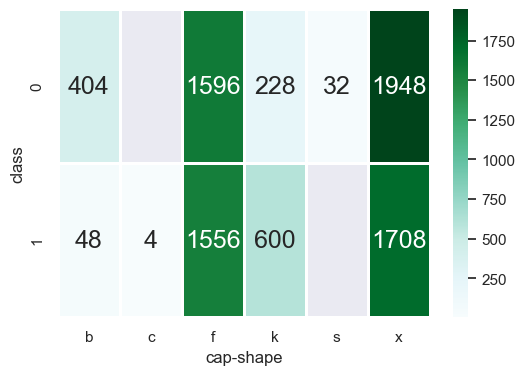

In [8]:
f = plt.figure(figsize=(6, 4))
sb.heatmap(mushroom.groupby(['class', 'cap-shape']).size().unstack(), 
           linewidths = 1, annot = True, fmt = 'g', annot_kws = {"size": 18}, cmap = "BuGn")

In [9]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

In [10]:
mushroom_cat = mushroom[['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']]
ohe.fit(mushroom_cat)
mushroom_cat_ohe = pd.DataFrame(ohe.transform(mushroom_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(mushroom_cat.columns))

In [11]:
mushroom_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, cap-shape_b to habitat_w
dtypes: float64(117)
memory usage: 7.3 MB


In [12]:
mushroom_res = mushroom['class']
mushroom_ohe = pd.concat([mushroom_cat_ohe, mushroom_res], 
                           sort = False, axis = 1)

Train Data
Accuracy  :	 0.9945480126626802

TPR Train :	 0.9992652461425422
TNR Train :	 0.9902159244264508

FPR Train :	 0.009784075573549258
FNR Train :	 0.0007347538574577516
Test Data
Accuracy  :	 0.9913863822805579

TPR Test :	 0.998324958123953
TNR Test :	 0.9847266881028939

FPR Test :	 0.01527331189710611
FNR Test :	 0.0016750418760469012


<AxesSubplot:>

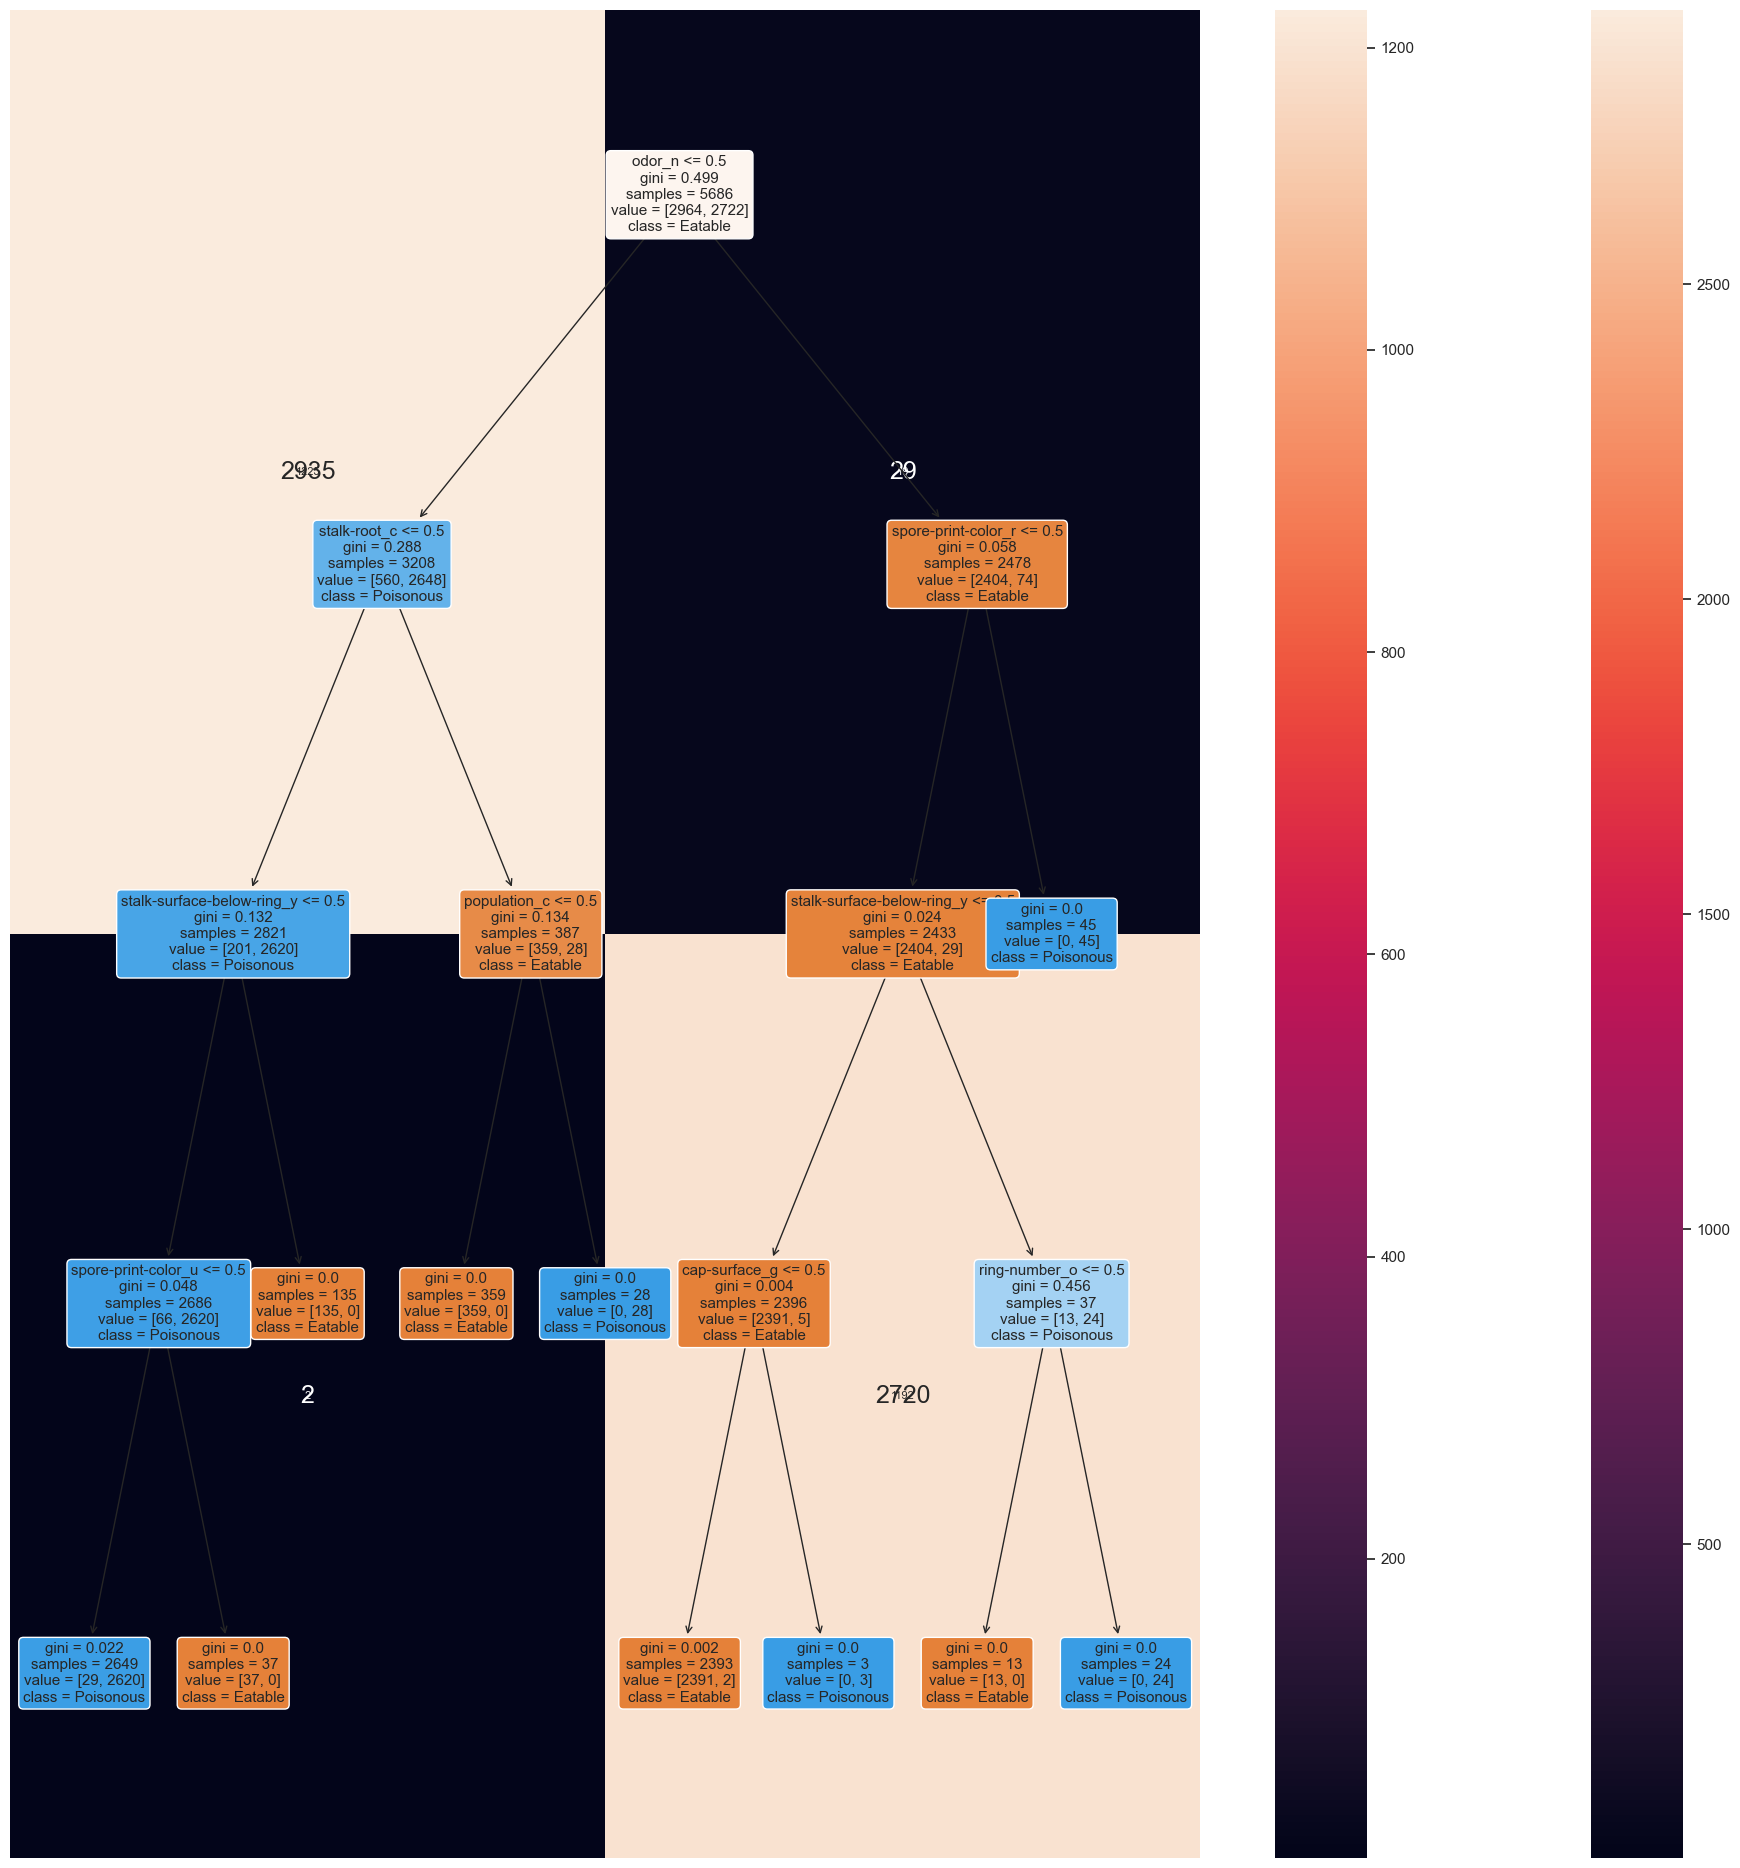

In [13]:
#depth 1
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

#print("Train 1")
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#print("Test 1")
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})

[Text(0.5, 0.75, 'odor_n <= 0.5\ngini = 0.5\nsamples = 5686\nvalue = [2923, 2763]\nclass = Eatable'),
 Text(0.25, 0.25, 'gini = 0.284\nsamples = 3230\nvalue = [554, 2676]\nclass = Poisonous'),
 Text(0.75, 0.25, 'gini = 0.068\nsamples = 2456\nvalue = [2369, 87]\nclass = Eatable')]

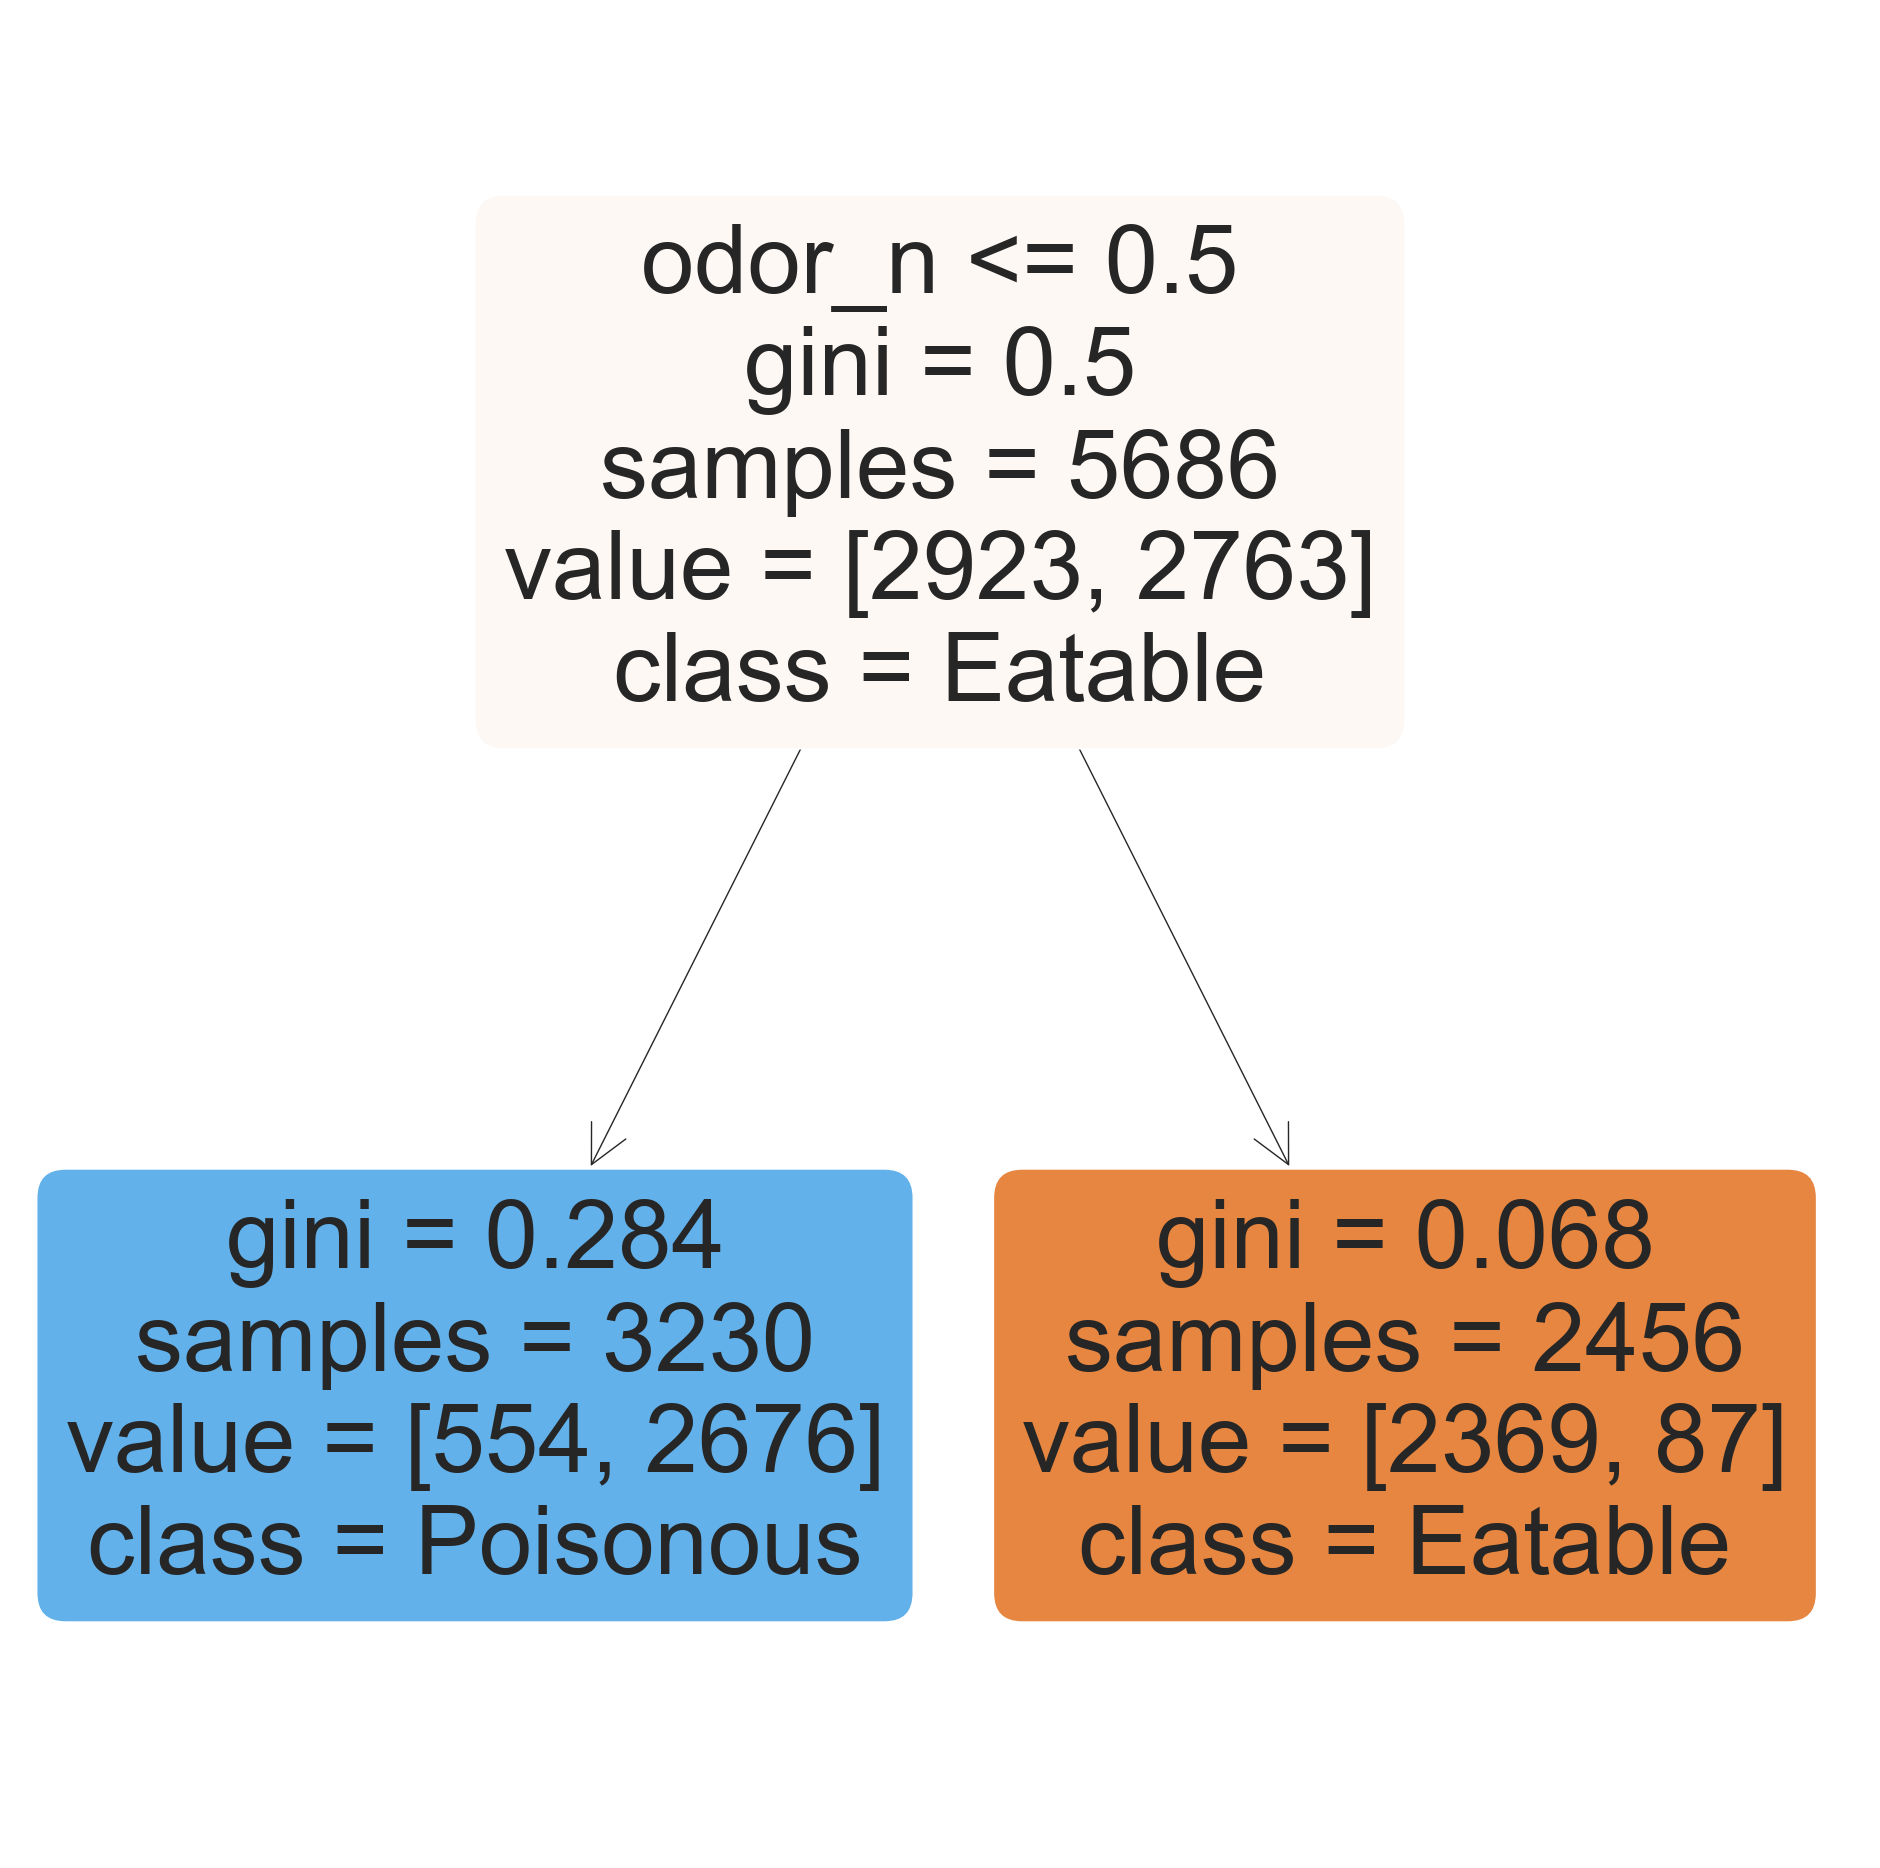

In [14]:
#depth 1
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 1)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

In [15]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

Train Data
Accuracy  :	 0.8872669715089694

TPR Train :	 0.9685124864277959
TNR Train :	 0.8104686965446459

FPR Train :	 0.1895313034553541
FNR Train :	 0.031487513572204126


Test Data
Accuracy  :	 0.8855619360131255

TPR Test :	 0.971379011274935
TNR Test :	 0.8085603112840467

FPR Test :	 0.19143968871595332
FNR Test :	 0.028620988725065046


<AxesSubplot:>

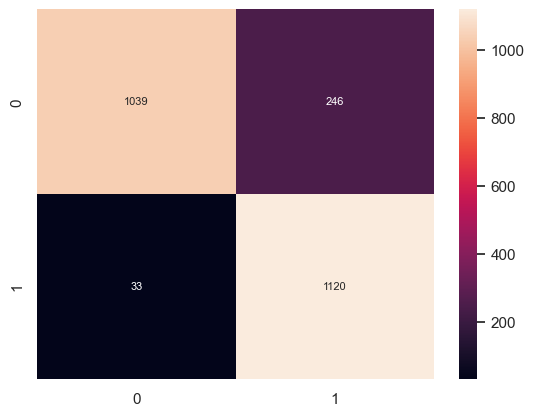

In [16]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 8})

[Text(0.5, 0.8333333333333334, 'odor_n <= 0.5\ngini = 0.5\nsamples = 5686\nvalue = [2923, 2763]\nclass = Eatable'),
 Text(0.25, 0.5, 'stalk-root_c <= 0.5\ngini = 0.286\nsamples = 3245\nvalue = [560, 2685]\nclass = Poisonous'),
 Text(0.125, 0.16666666666666666, 'gini = 0.135\nsamples = 2867\nvalue = [209, 2658]\nclass = Poisonous'),
 Text(0.375, 0.16666666666666666, 'gini = 0.133\nsamples = 378\nvalue = [351, 27]\nclass = Eatable'),
 Text(0.75, 0.5, 'spore-print-color_r <= 0.5\ngini = 0.062\nsamples = 2441\nvalue = [2363, 78]\nclass = Eatable'),
 Text(0.625, 0.16666666666666666, 'gini = 0.026\nsamples = 2394\nvalue = [2363, 31]\nclass = Eatable'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 47\nvalue = [0, 47]\nclass = Poisonous')]

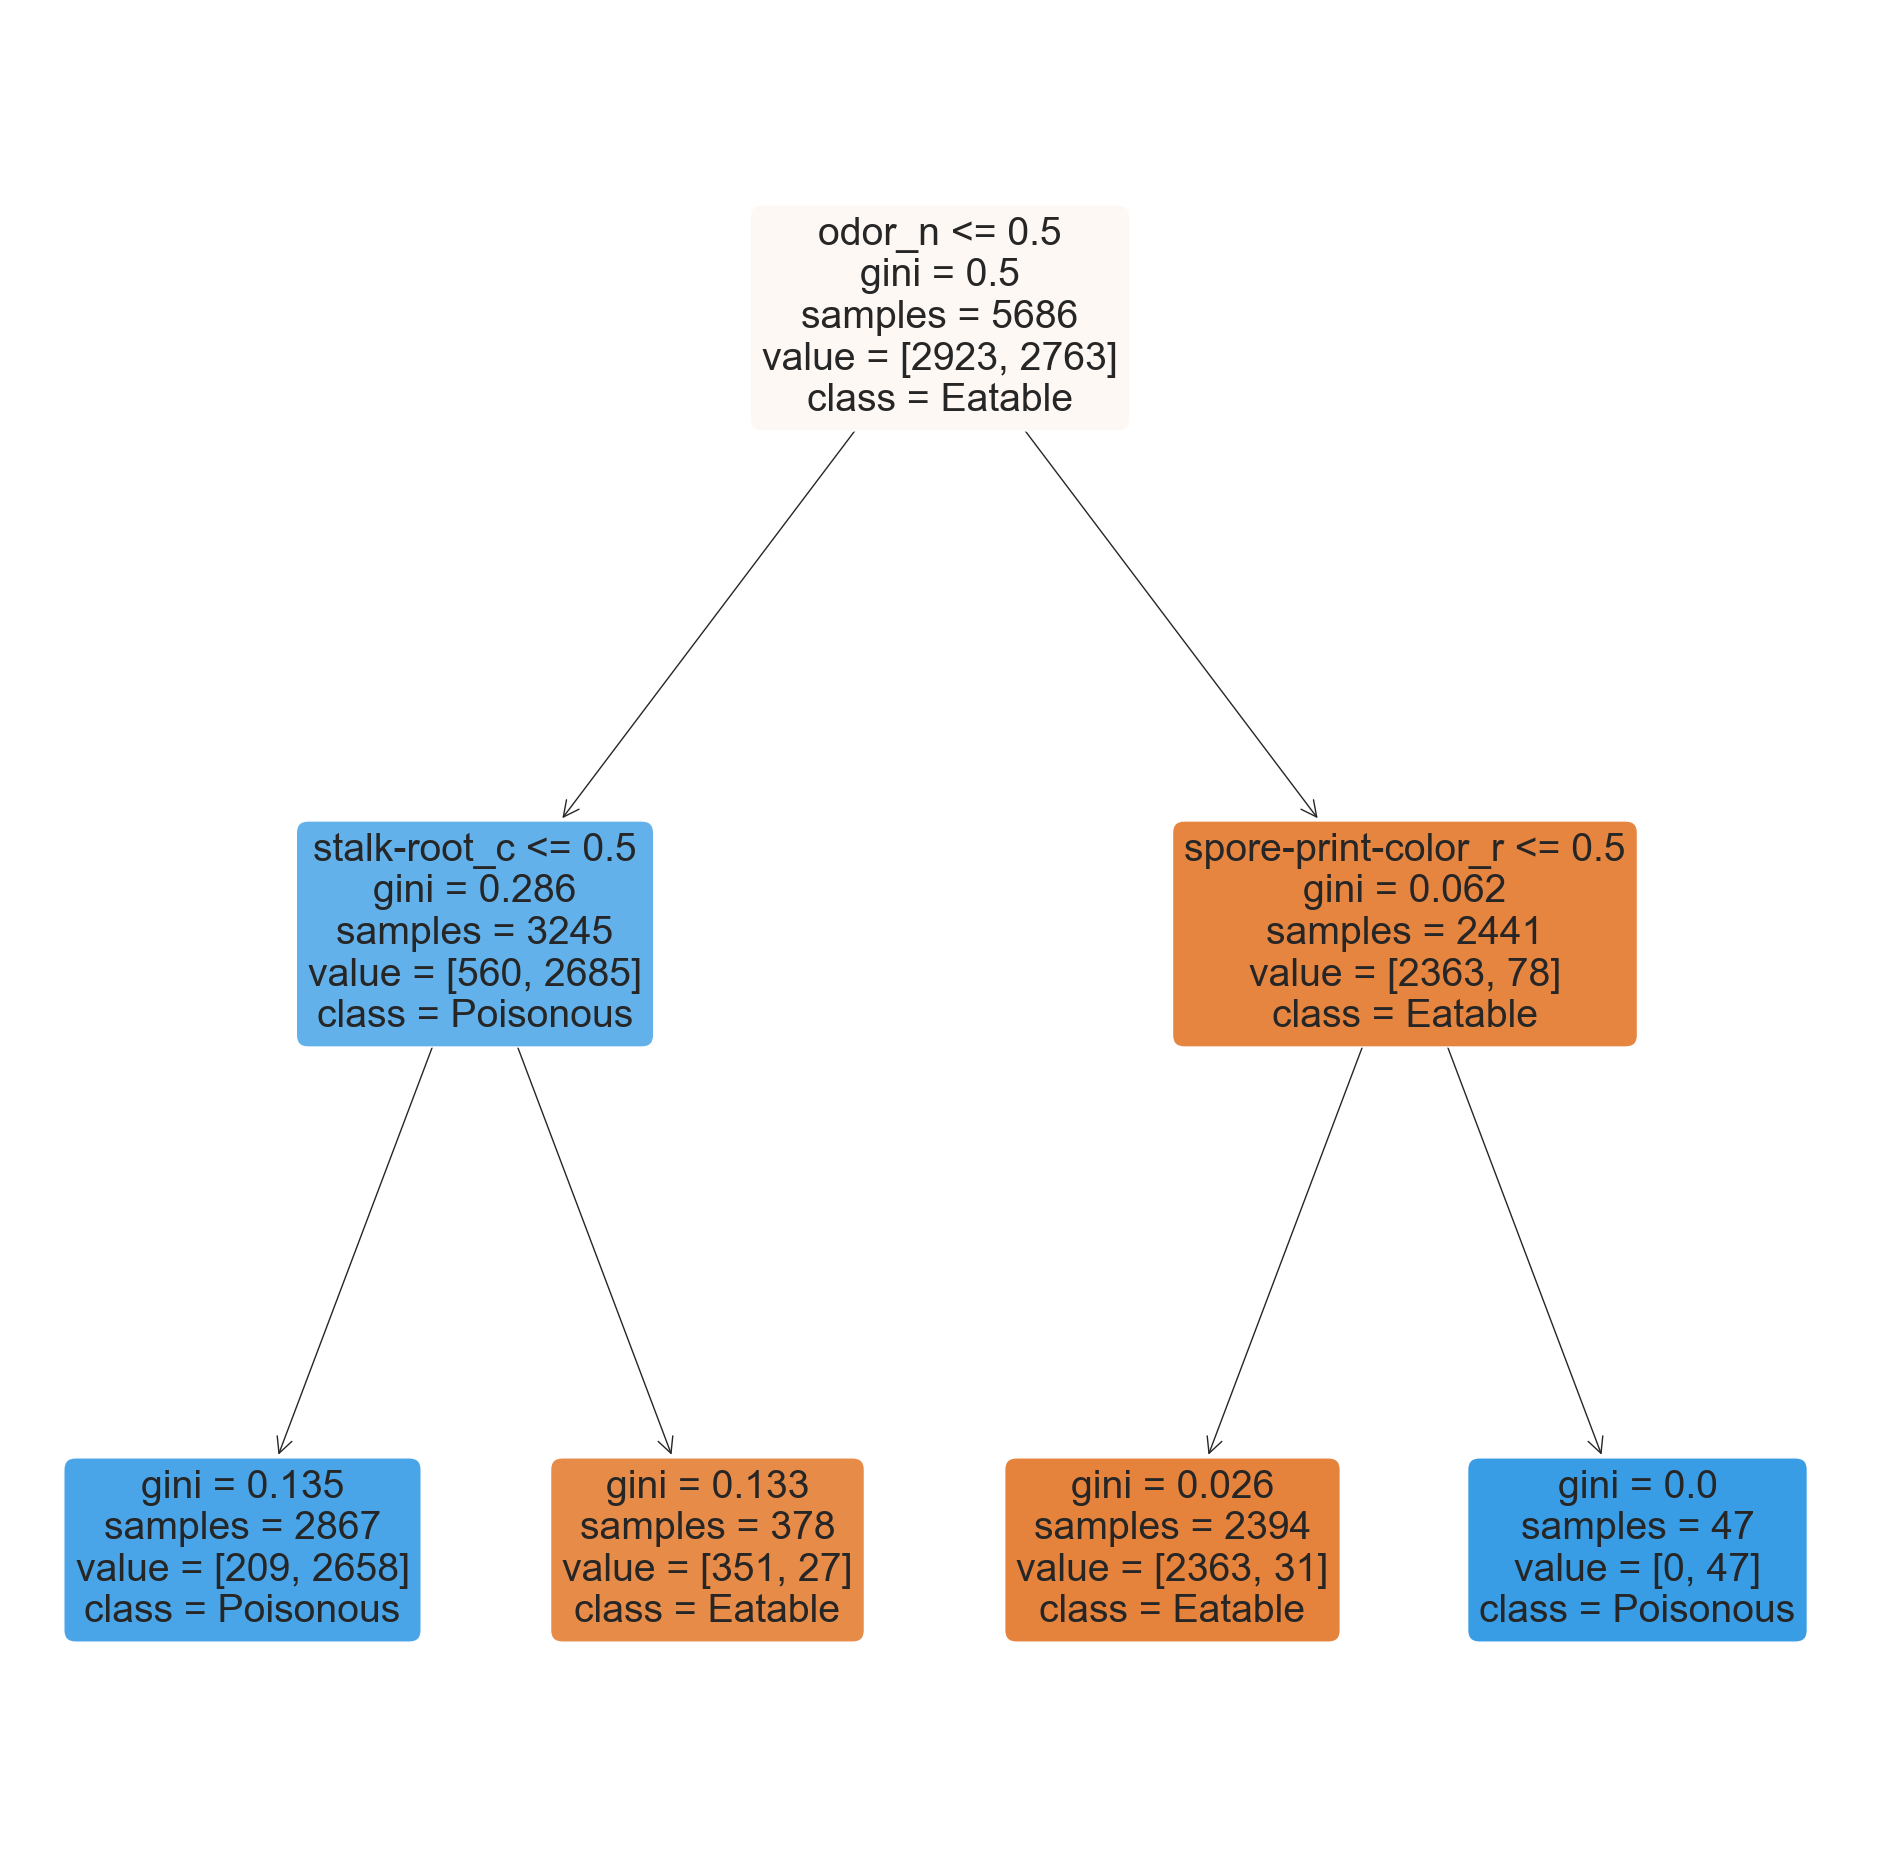

In [17]:
#depth 2
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 2)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.953042560675343

TPR Train :	 0.9790083242851972
TNR Train :	 0.9284981183715361

FPR Train :	 0.07150188162846391
FNR Train :	 0.02099167571480275


<AxesSubplot:>

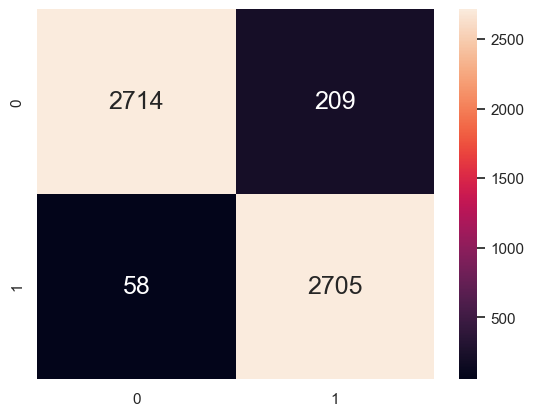

In [18]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9569319114027892

TPR Test :	 0.9774501300954033
TNR Test :	 0.9385214007782101

FPR Test :	 0.06147859922178988
FNR Test :	 0.022549869904596703


<AxesSubplot:>

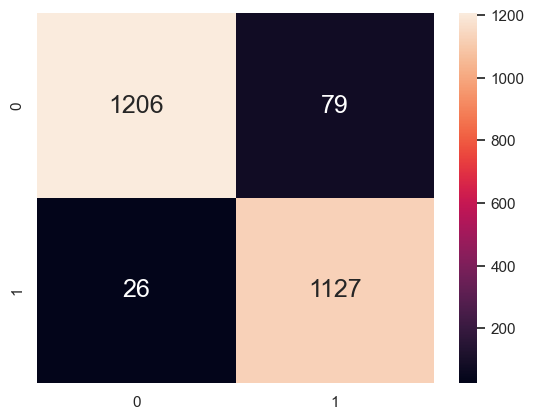

In [19]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(0.5769230769230769, 0.875, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2958, 2728]\nclass = Eatable'),
 Text(0.3076923076923077, 0.625, 'stalk-root_c <= 0.5\ngini = 0.298\nsamples = 3223\nvalue = [587, 2636]\nclass = Poisonous'),
 Text(0.15384615384615385, 0.375, 'stalk-surface-below-ring_y <= 0.5\ngini = 0.134\nsamples = 2815\nvalue = [204, 2611]\nclass = Poisonous'),
 Text(0.07692307692307693, 0.125, 'gini = 0.045\nsamples = 2673\nvalue = [62, 2611]\nclass = Poisonous'),
 Text(0.23076923076923078, 0.125, 'gini = 0.0\nsamples = 142\nvalue = [142, 0]\nclass = Eatable'),
 Text(0.46153846153846156, 0.375, 'stalk-surface-below-ring_y <= 0.5\ngini = 0.115\nsamples = 408\nvalue = [383, 25]\nclass = Eatable'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 383\nvalue = [383, 0]\nclass = Eatable'),
 Text(0.5384615384615384, 0.125, 'gini = 0.0\nsamples = 25\nvalue = [0, 25]\nclass = Poisonous'),
 Text(0.8461538461538461, 0.625, 'spore-print-color_r <= 0.5\ngini = 0.0

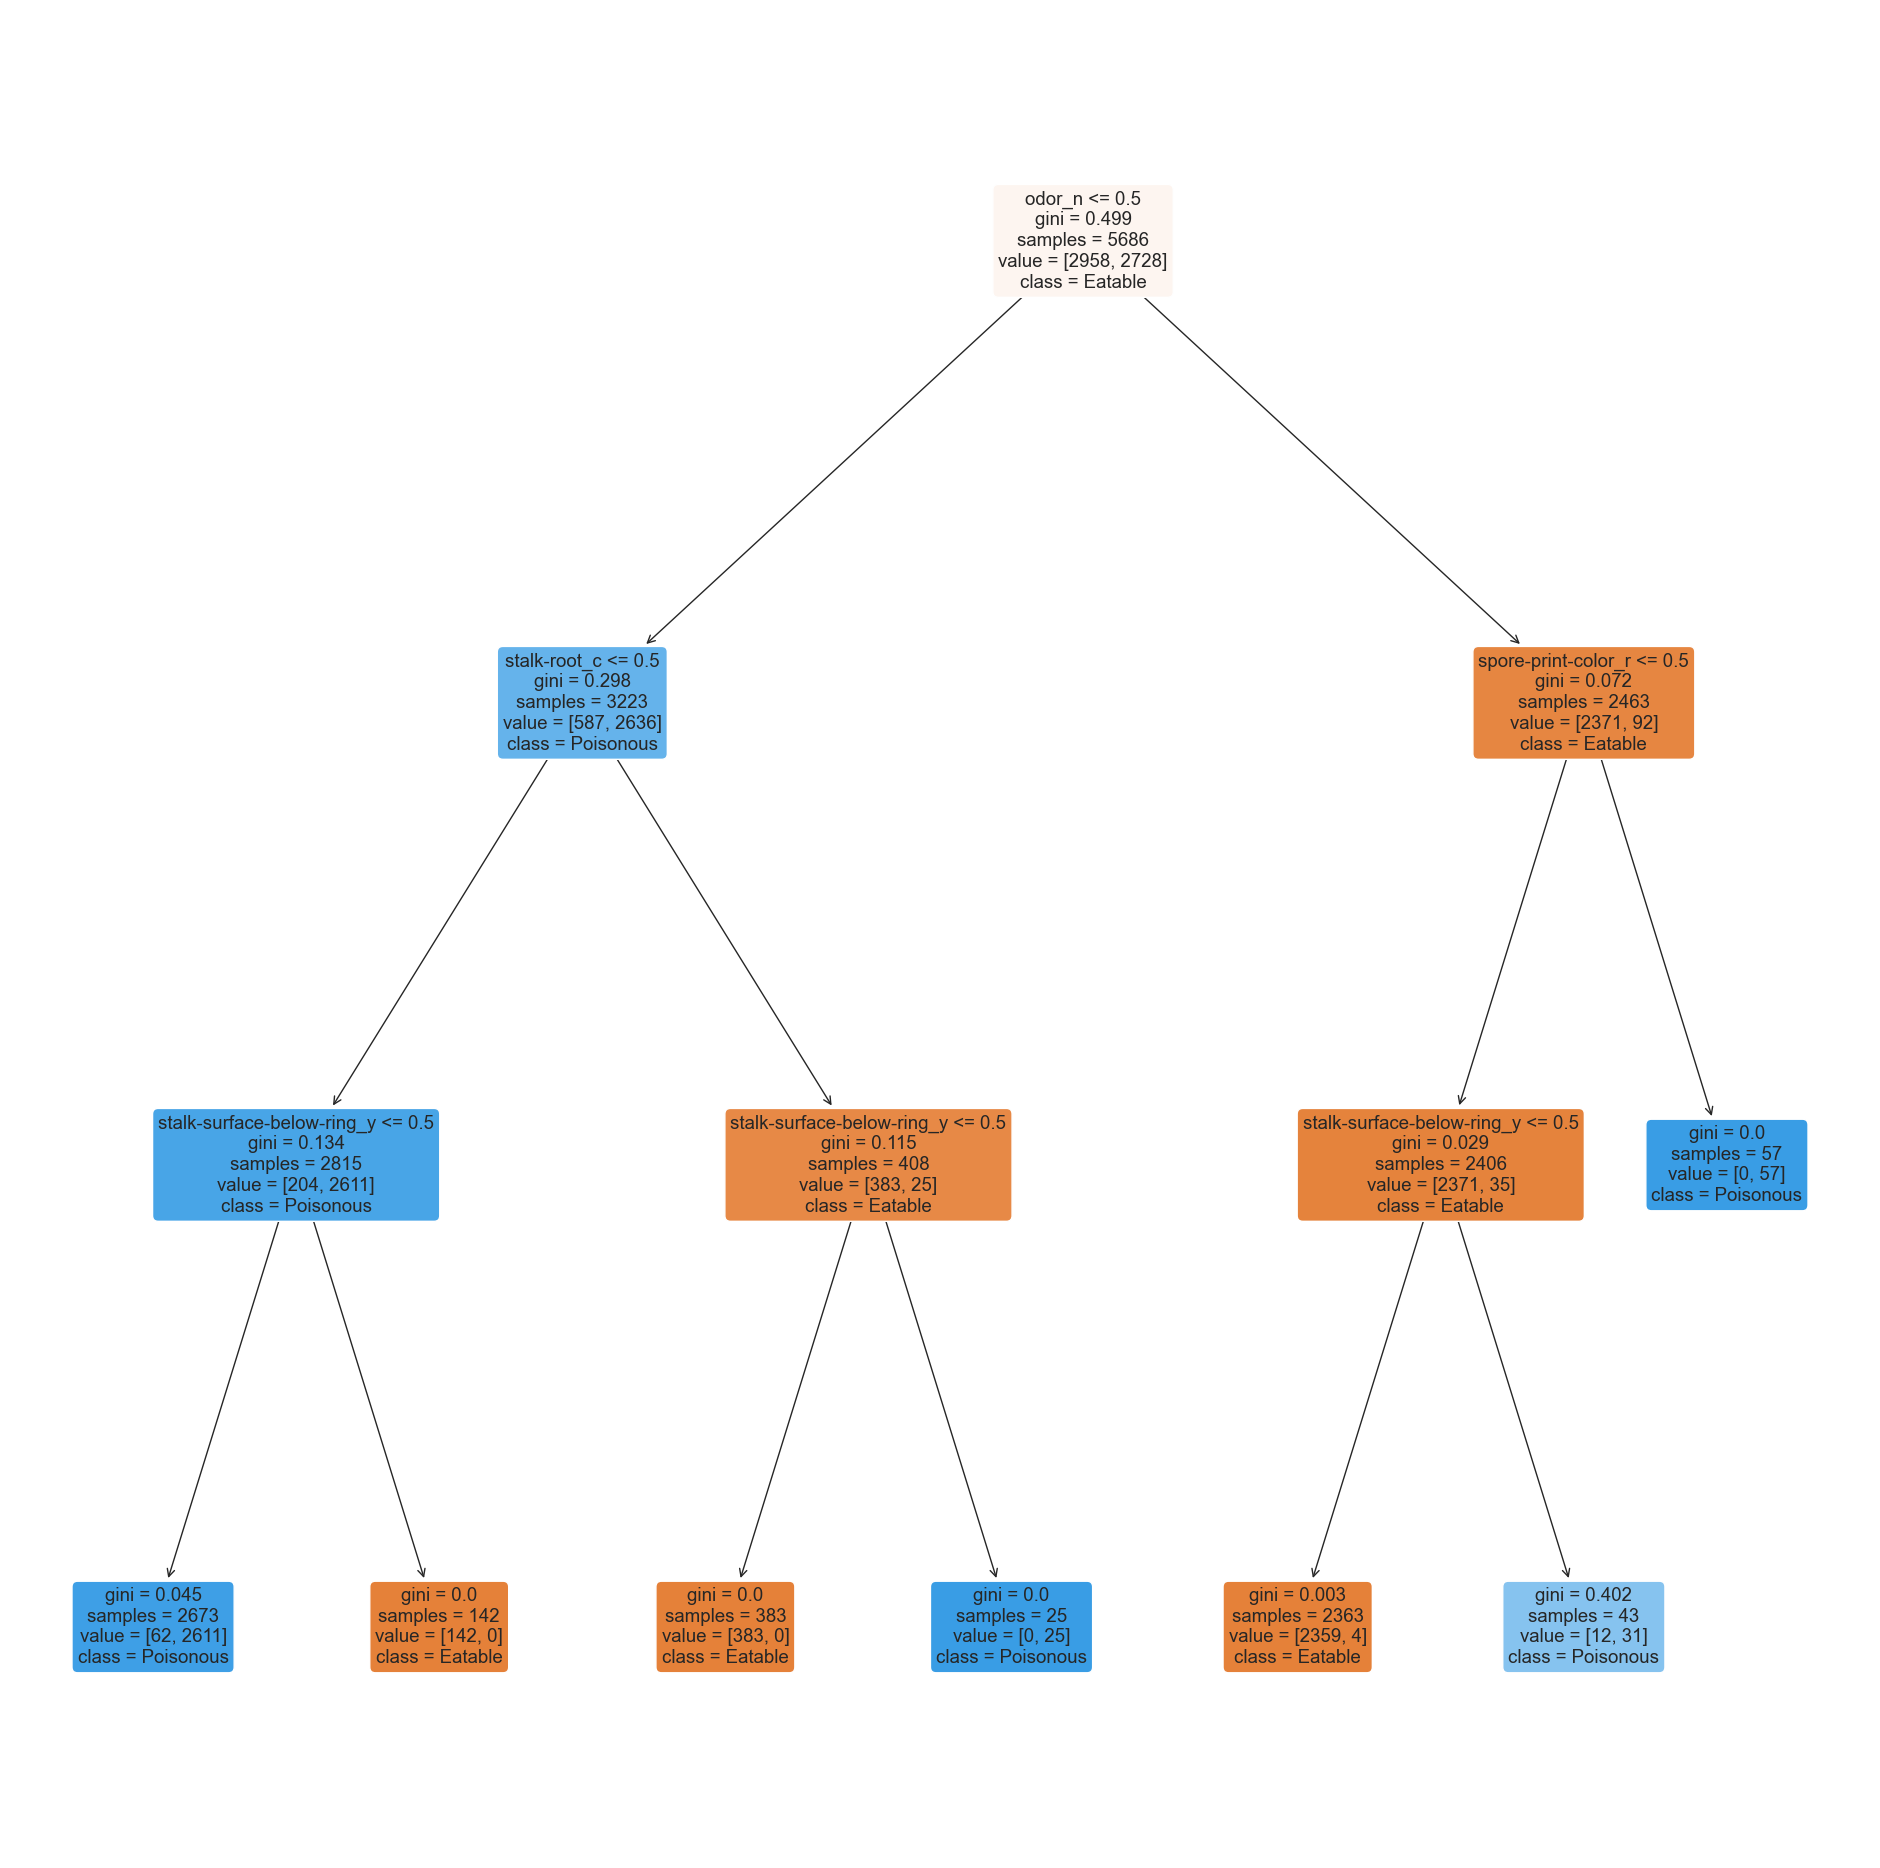

In [20]:
#depth 3
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 3)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.9862820963770664

TPR Train :	 0.998533724340176
TNR Train :	 0.9749830966869506

FPR Train :	 0.025016903313049357
FNR Train :	 0.001466275659824047


<AxesSubplot:>

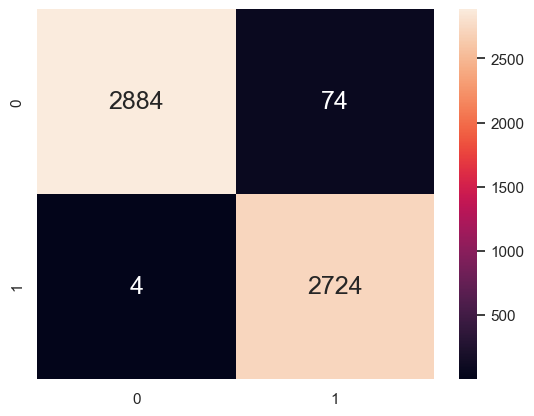

In [21]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9827727645611156

TPR Test :	 0.9966329966329966
TNR Test :	 0.9696

FPR Test :	 0.0304
FNR Test :	 0.003367003367003367


<AxesSubplot:>

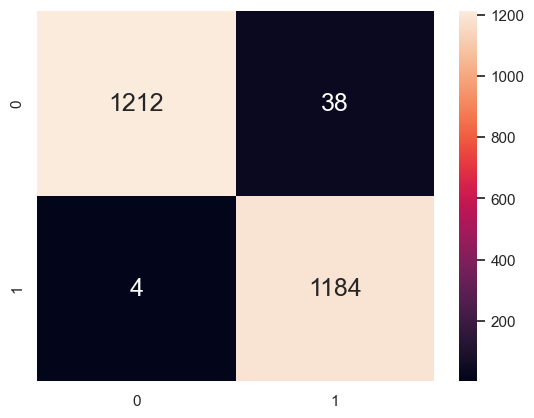

In [22]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(0.5625, 0.9, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2979, 2707]\nclass = Eatable'),
 Text(0.3125, 0.7, 'stalk-root_c <= 0.5\ngini = 0.29\nsamples = 3178\nvalue = [560, 2618]\nclass = Poisonous'),
 Text(0.1875, 0.5, 'stalk-surface-below-ring_y <= 0.5\ngini = 0.135\nsamples = 2805\nvalue = [204, 2601]\nclass = Poisonous'),
 Text(0.125, 0.3, 'gill-spacing_w <= 0.5\ngini = 0.051\nsamples = 2671\nvalue = [70, 2601]\nclass = Poisonous'),
 Text(0.0625, 0.1, 'gini = 0.0\nsamples = 2544\nvalue = [0, 2544]\nclass = Poisonous'),
 Text(0.1875, 0.1, 'gini = 0.495\nsamples = 127\nvalue = [70, 57]\nclass = Eatable'),
 Text(0.25, 0.3, 'gini = 0.0\nsamples = 134\nvalue = [134, 0]\nclass = Eatable'),
 Text(0.4375, 0.5, 'spore-print-color_w <= 0.5\ngini = 0.087\nsamples = 373\nvalue = [356, 17]\nclass = Eatable'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 356\nvalue = [356, 0]\nclass = Eatable'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = Poisonous'),
 Text(0

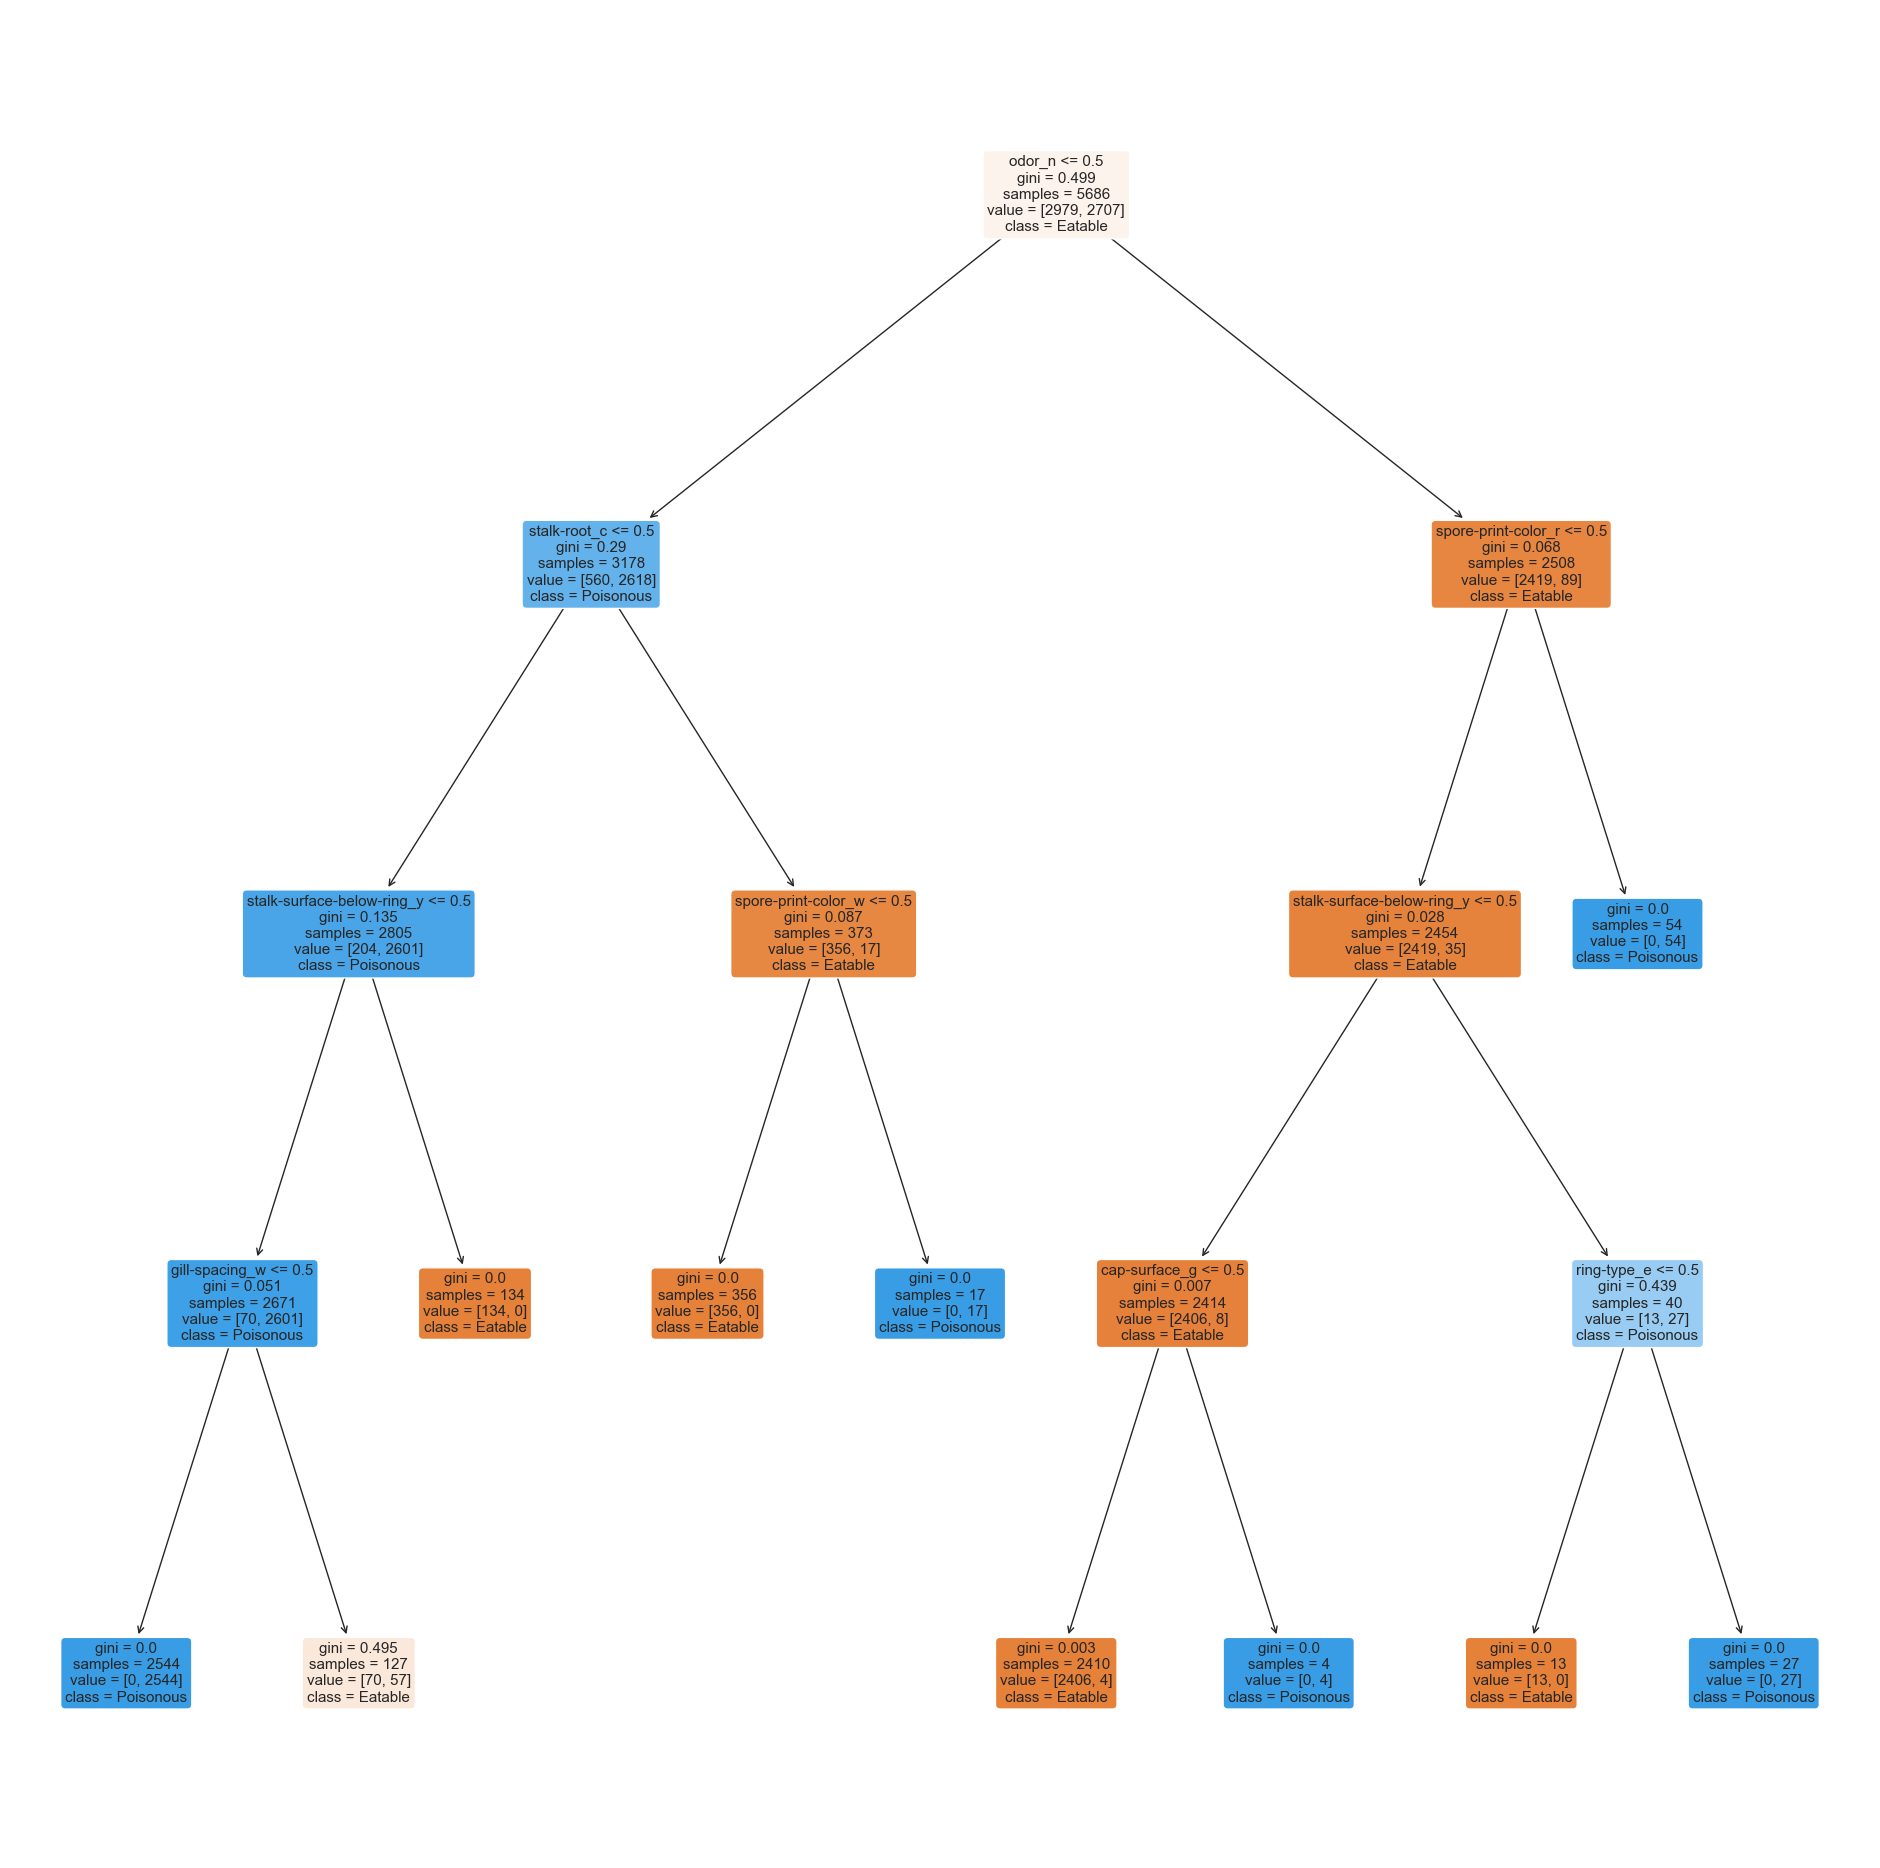

In [23]:
#depth 4
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 4)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.9892718958846289

TPR Train :	 0.9774658293313632
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.022534170668636867


<AxesSubplot:>

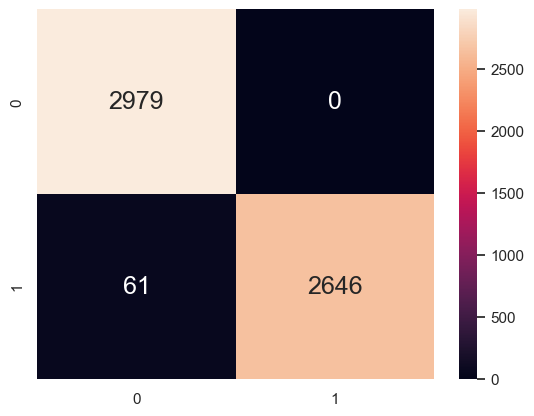

In [24]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9840032813781788

TPR Test :	 0.967741935483871
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.03225806451612903


<AxesSubplot:>

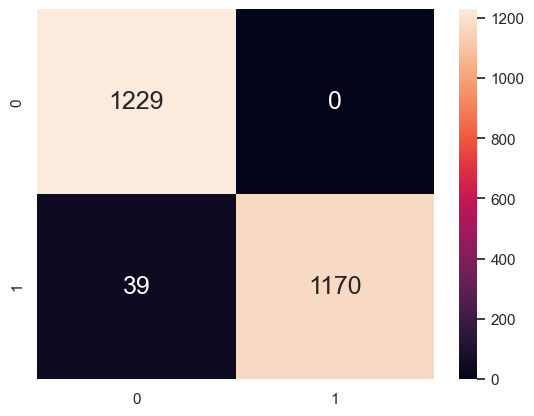

In [25]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(0.5882352941176471, 0.9166666666666666, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2935, 2751]\nclass = Eatable'),
 Text(0.35294117647058826, 0.75, 'stalk-root_c <= 0.5\ngini = 0.291\nsamples = 3243\nvalue = [573, 2670]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.5833333333333334, 'stalk-root_r <= 0.5\ngini = 0.135\nsamples = 2855\nvalue = [208, 2647]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.4166666666666667, 'odor_a <= 0.5\ngini = 0.045\nsamples = 2710\nvalue = [63, 2647]\nclass = Poisonous'),
 Text(0.11764705882352941, 0.25, 'odor_l <= 0.5\ngini = 0.022\nsamples = 2677\nvalue = [30, 2647]\nclass = Poisonous'),
 Text(0.058823529411764705, 0.08333333333333333, 'gini = 0.0\nsamples = 2647\nvalue = [0, 2647]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.08333333333333333, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = Eatable'),
 Text(0.23529411764705882, 0.25, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = Eatable'),
 Text(0.294117647058

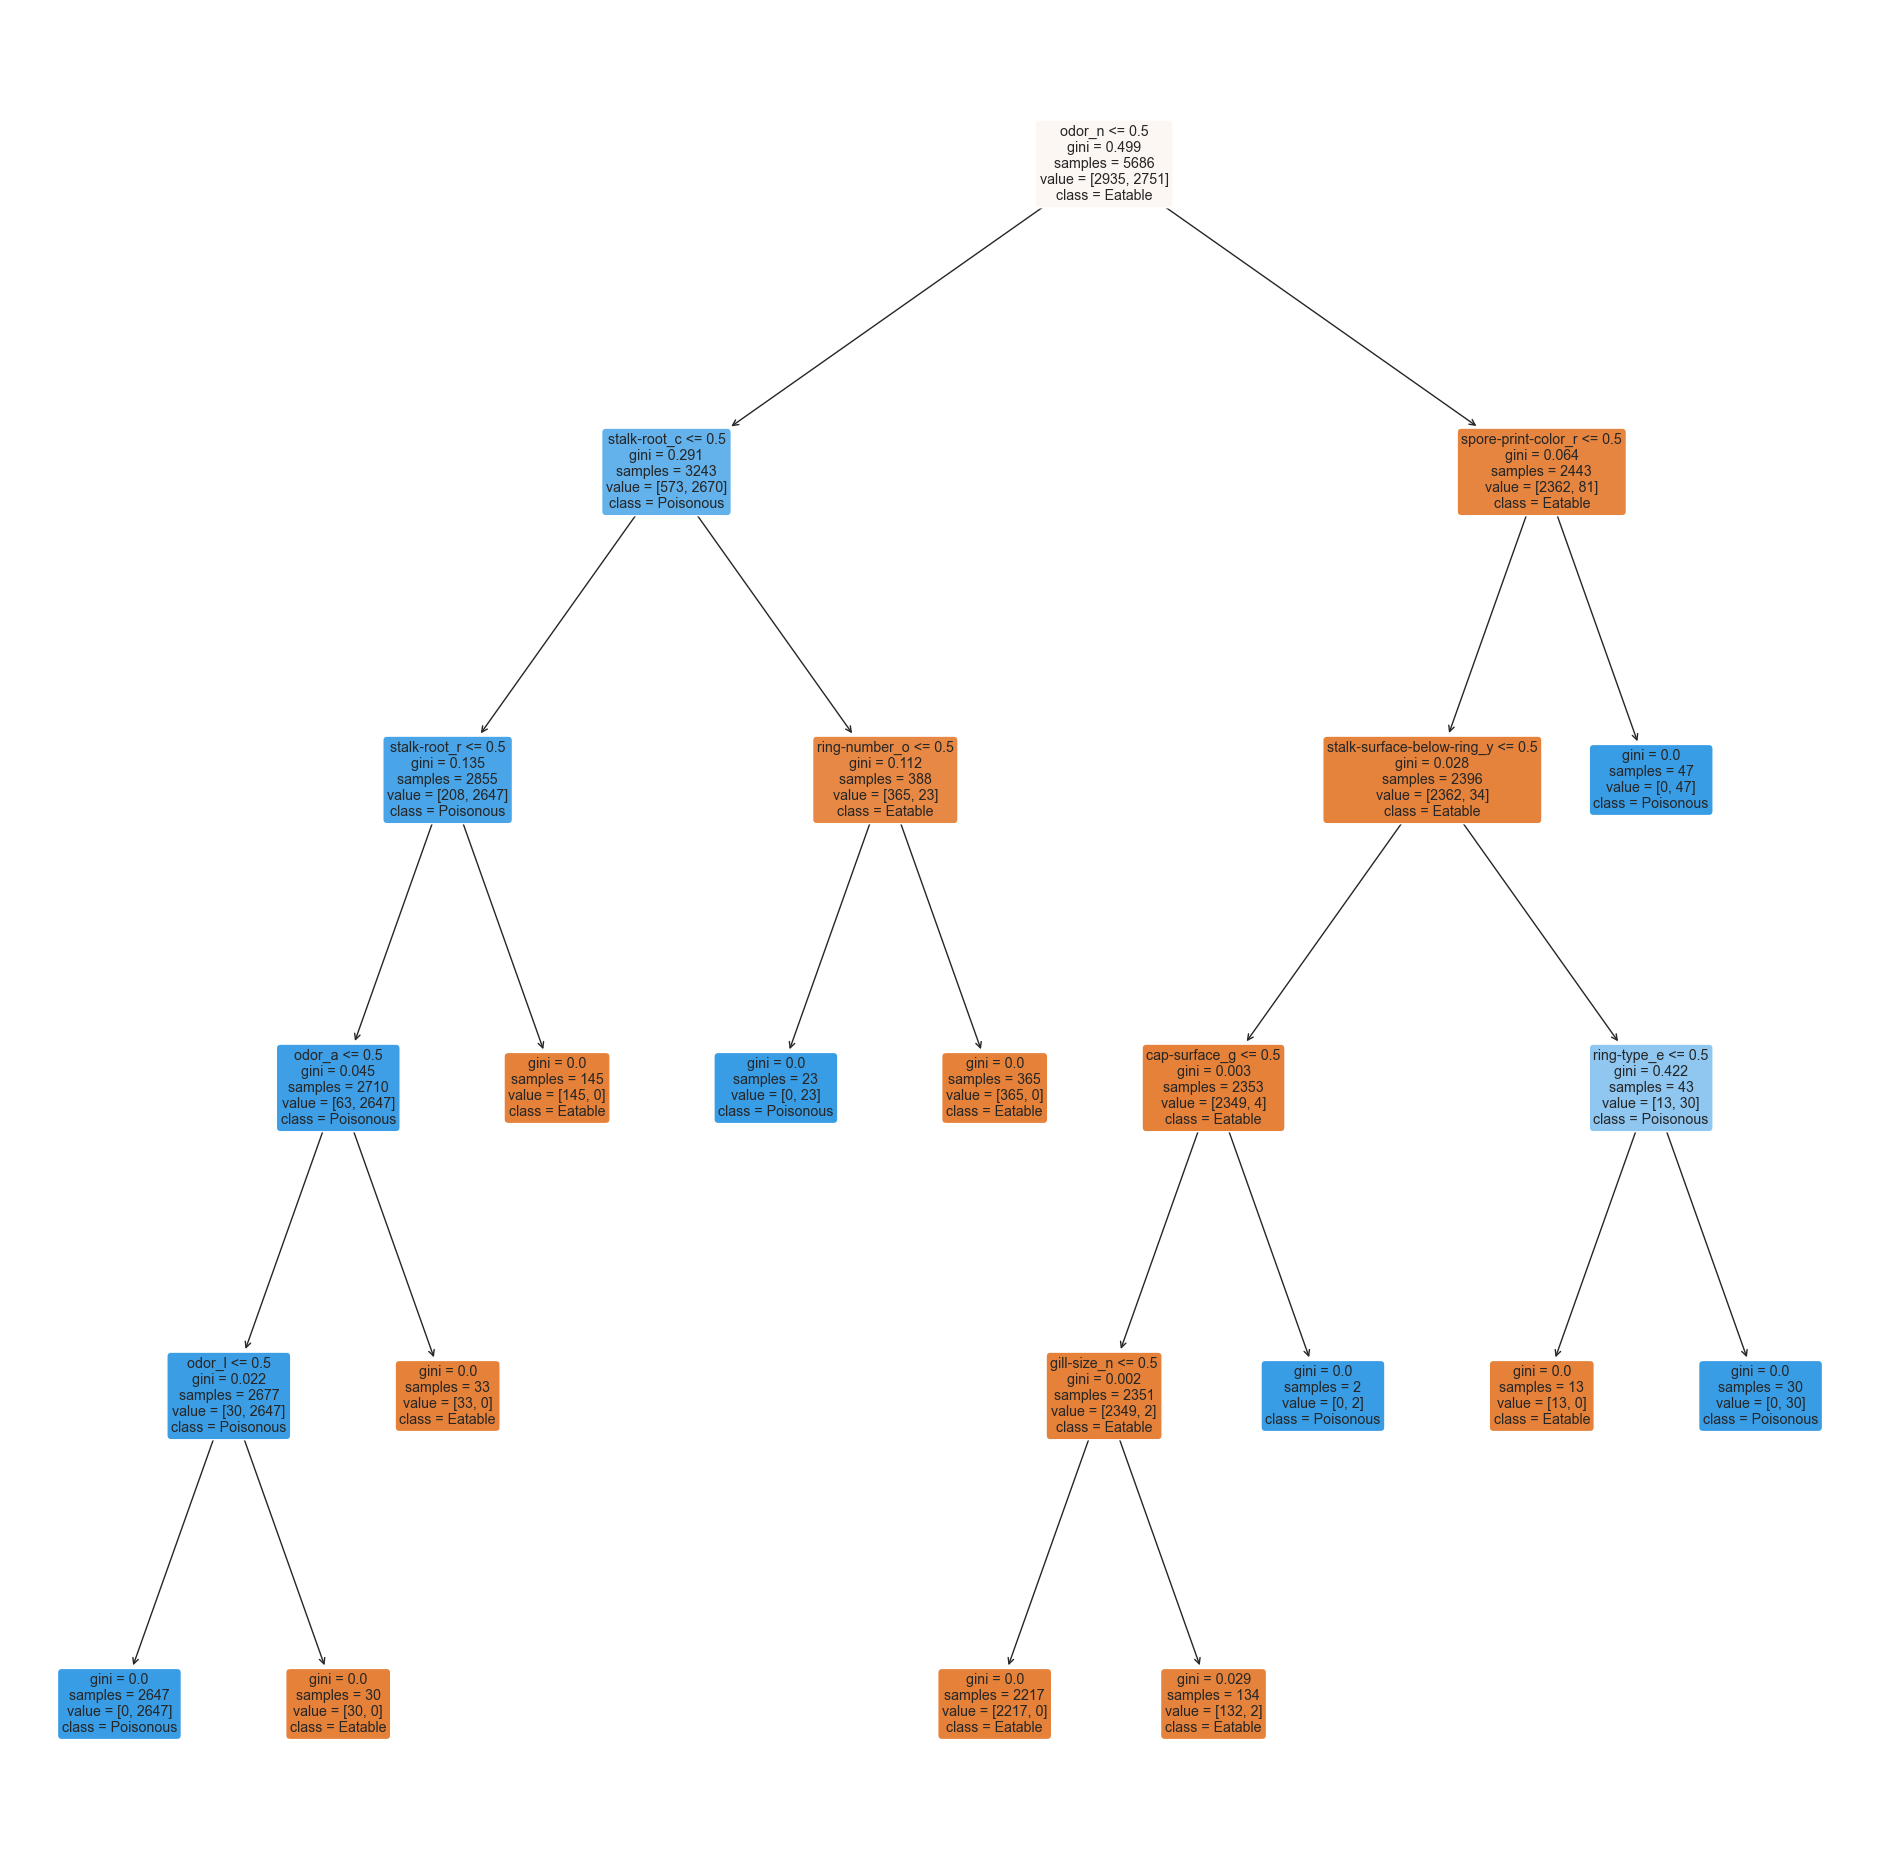

In [26]:
#depth 5
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 5)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 0.9996482588814632

TPR Train :	 0.9992729916394039
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0007270083605961468


<AxesSubplot:>

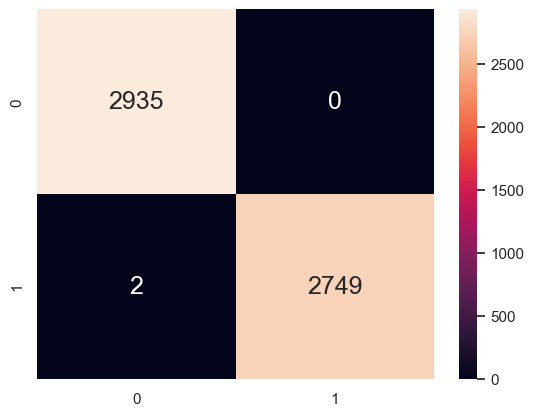

In [27]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.9991796554552912

TPR Test :	 0.9982832618025751
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.0017167381974248926


<AxesSubplot:>

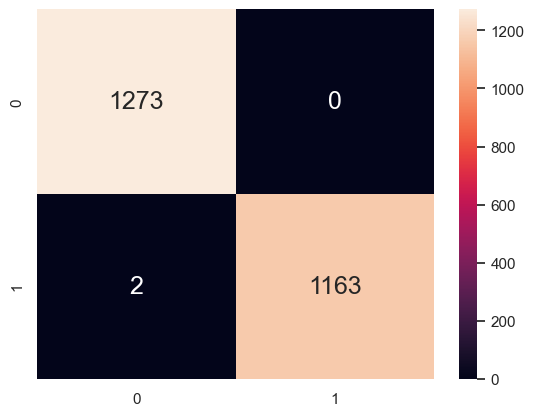

In [28]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(0.5882352941176471, 0.9285714285714286, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2938, 2748]\nclass = Eatable'),
 Text(0.35294117647058826, 0.7857142857142857, 'stalk-root_c <= 0.5\ngini = 0.287\nsamples = 3241\nvalue = [564, 2677]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.6428571428571429, 'stalk-root_r <= 0.5\ngini = 0.132\nsamples = 2861\nvalue = [204, 2657]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.5, 'odor_l <= 0.5\ngini = 0.05\nsamples = 2727\nvalue = [70, 2657]\nclass = Poisonous'),
 Text(0.11764705882352941, 0.35714285714285715, 'odor_a <= 0.5\ngini = 0.022\nsamples = 2687\nvalue = [30, 2657]\nclass = Poisonous'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.0\nsamples = 2657\nvalue = [0, 2657]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = Eatable'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 40\nvalue = [40, 0]\nclass = Eat

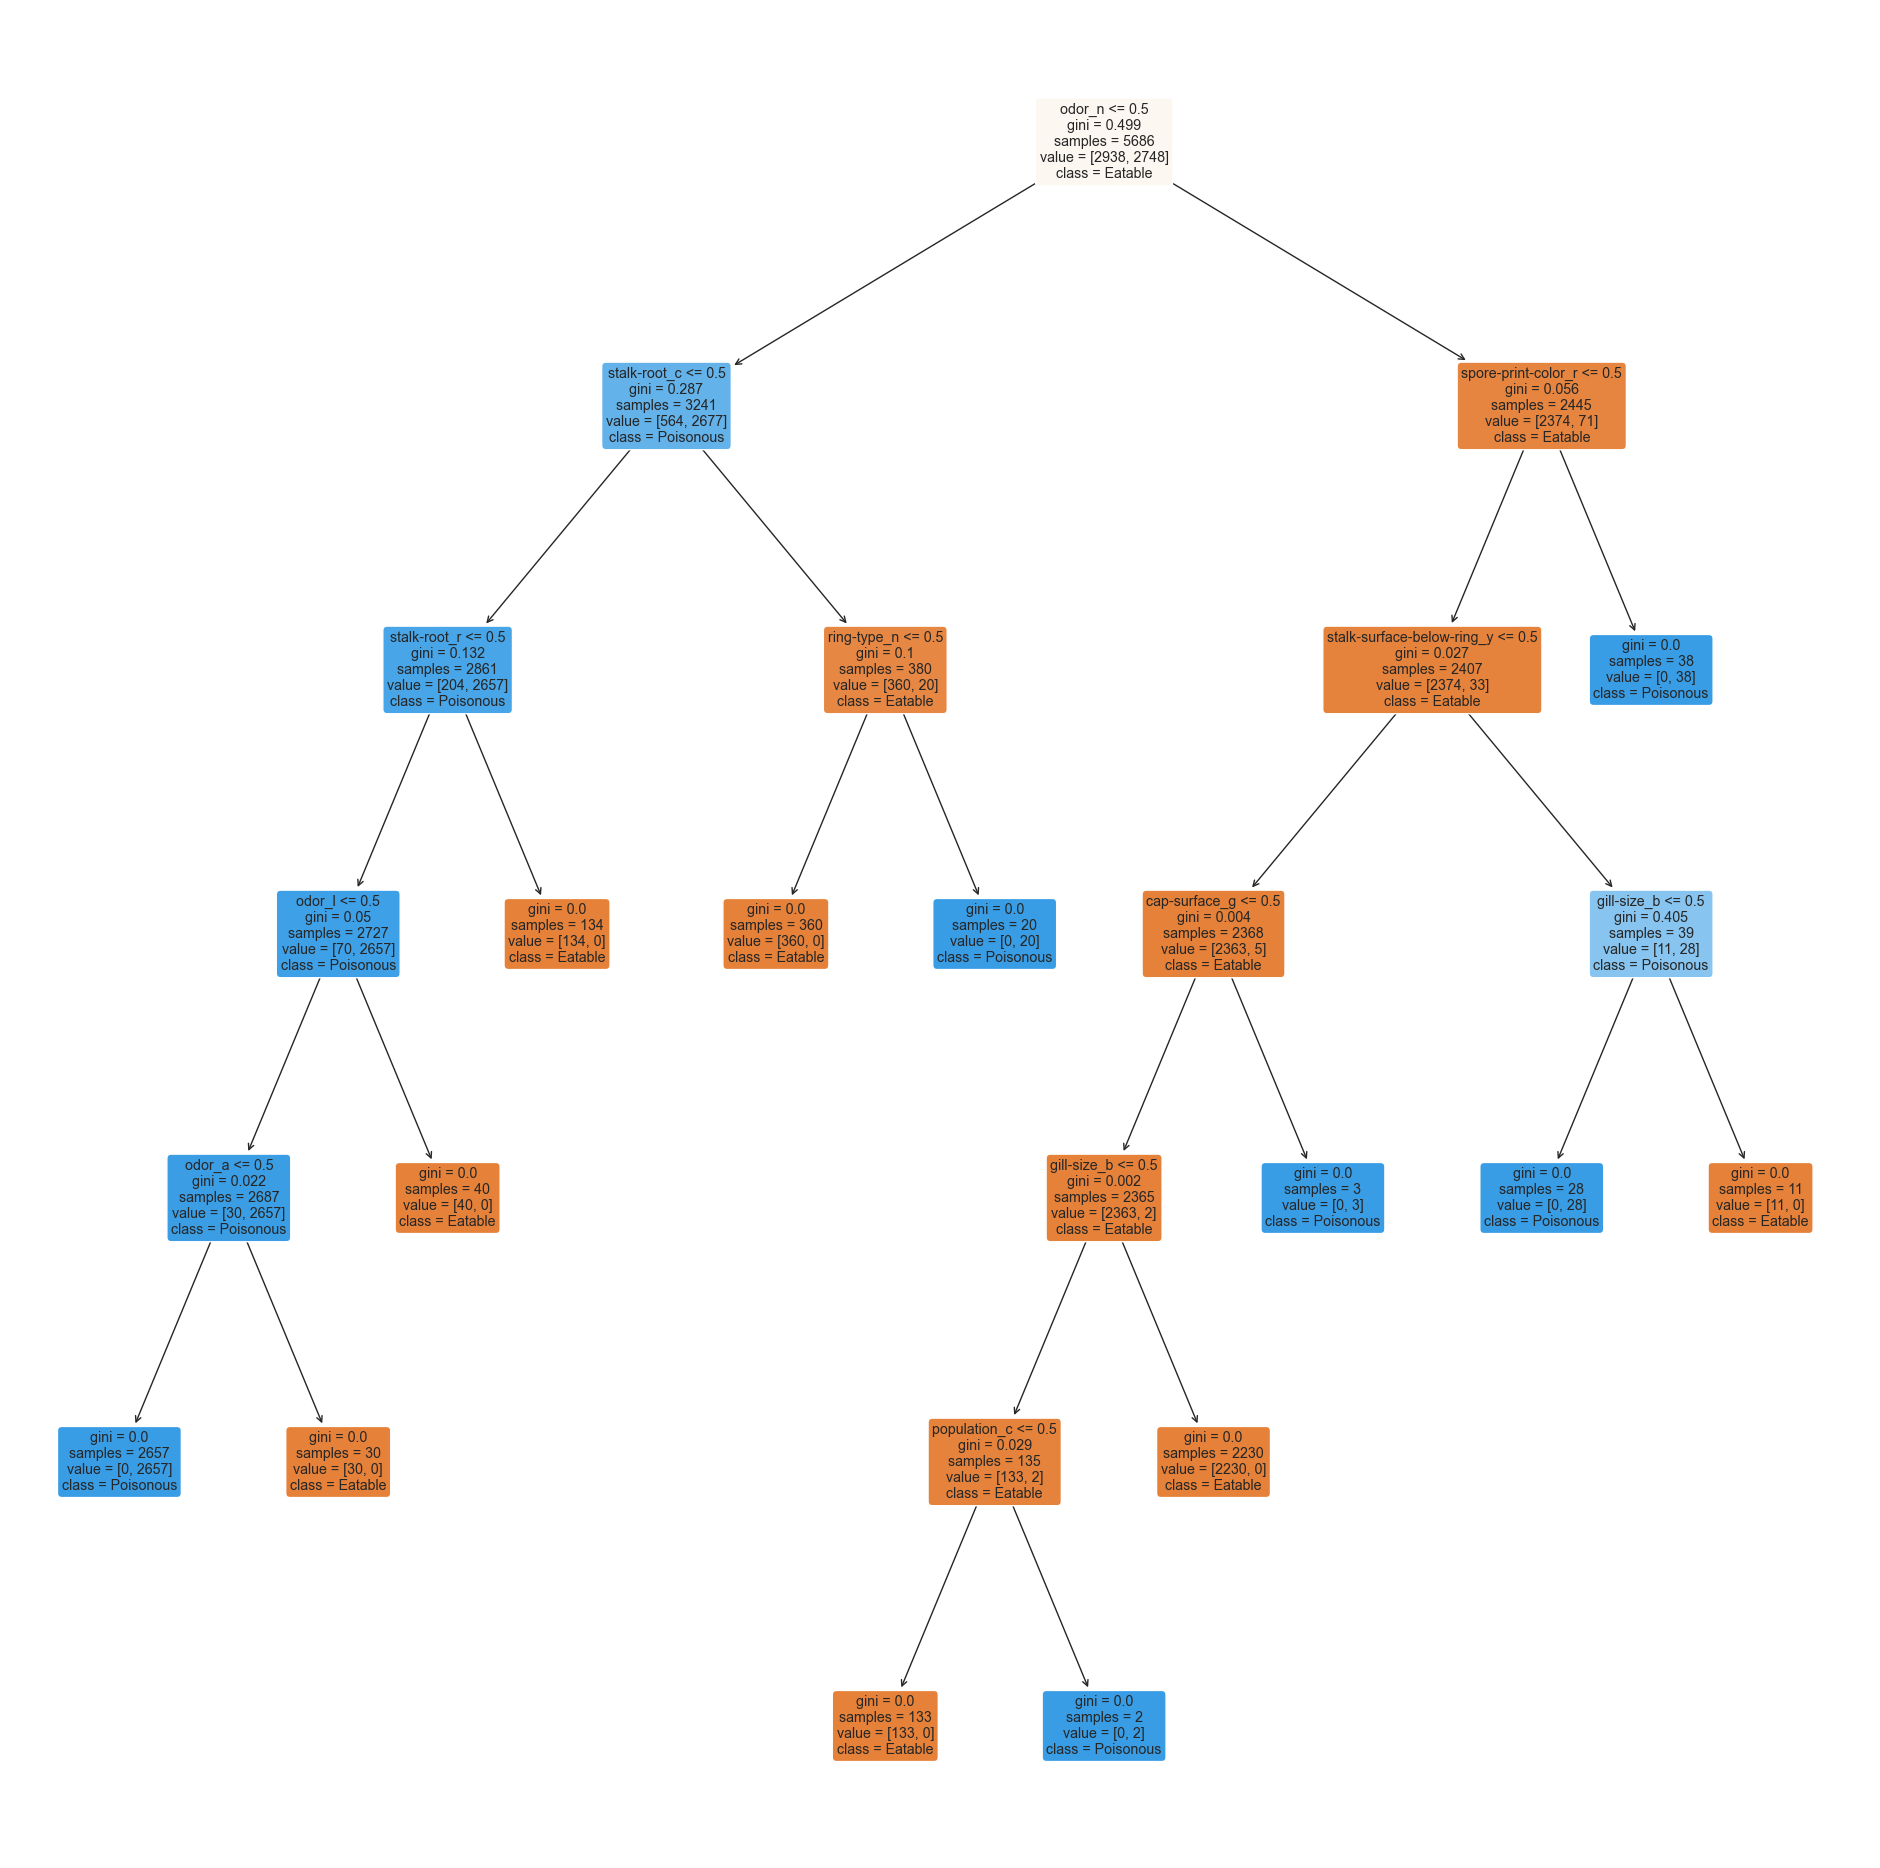

In [29]:
#depth 6
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 6)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


<AxesSubplot:>

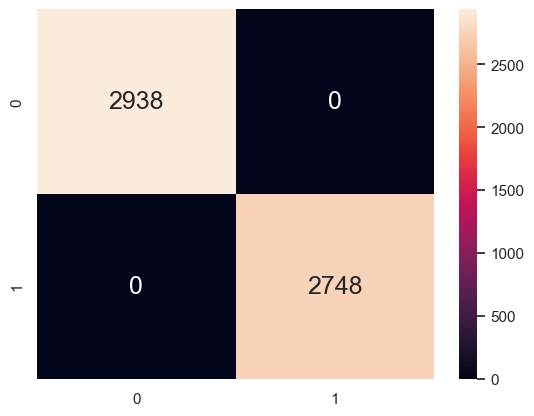

In [30]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 1.0

TPR Test :	 1.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.0


<AxesSubplot:>

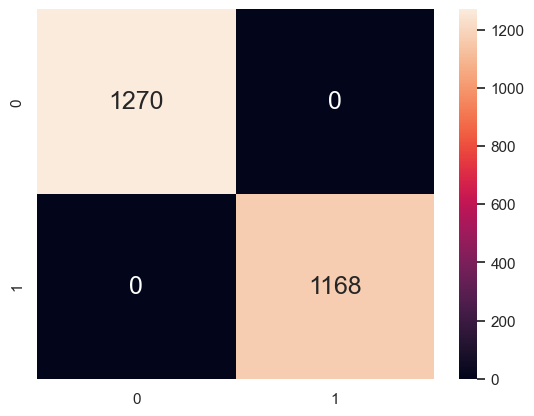

In [31]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(0.5882352941176471, 0.9375, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2955, 2731]\nclass = Eatable'),
 Text(0.35294117647058826, 0.8125, 'stalk-root_c <= 0.5\ngini = 0.286\nsamples = 3208\nvalue = [554, 2654]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.6875, 'stalk-surface-below-ring_y <= 0.5\ngini = 0.133\nsamples = 2830\nvalue = [203, 2627]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.5625, 'odor_l <= 0.5\ngini = 0.046\nsamples = 2690\nvalue = [63, 2627]\nclass = Poisonous'),
 Text(0.11764705882352941, 0.4375, 'odor_a <= 0.5\ngini = 0.022\nsamples = 2657\nvalue = [30, 2627]\nclass = Poisonous'),
 Text(0.058823529411764705, 0.3125, 'gini = 0.0\nsamples = 2627\nvalue = [0, 2627]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.3125, 'gini = 0.0\nsamples = 30\nvalue = [30, 0]\nclass = Eatable'),
 Text(0.23529411764705882, 0.4375, 'gini = 0.0\nsamples = 33\nvalue = [33, 0]\nclass = Eatable'),
 Text(0.29411764705882354, 0.5625, 'gini = 0.0\nsamples = 140\

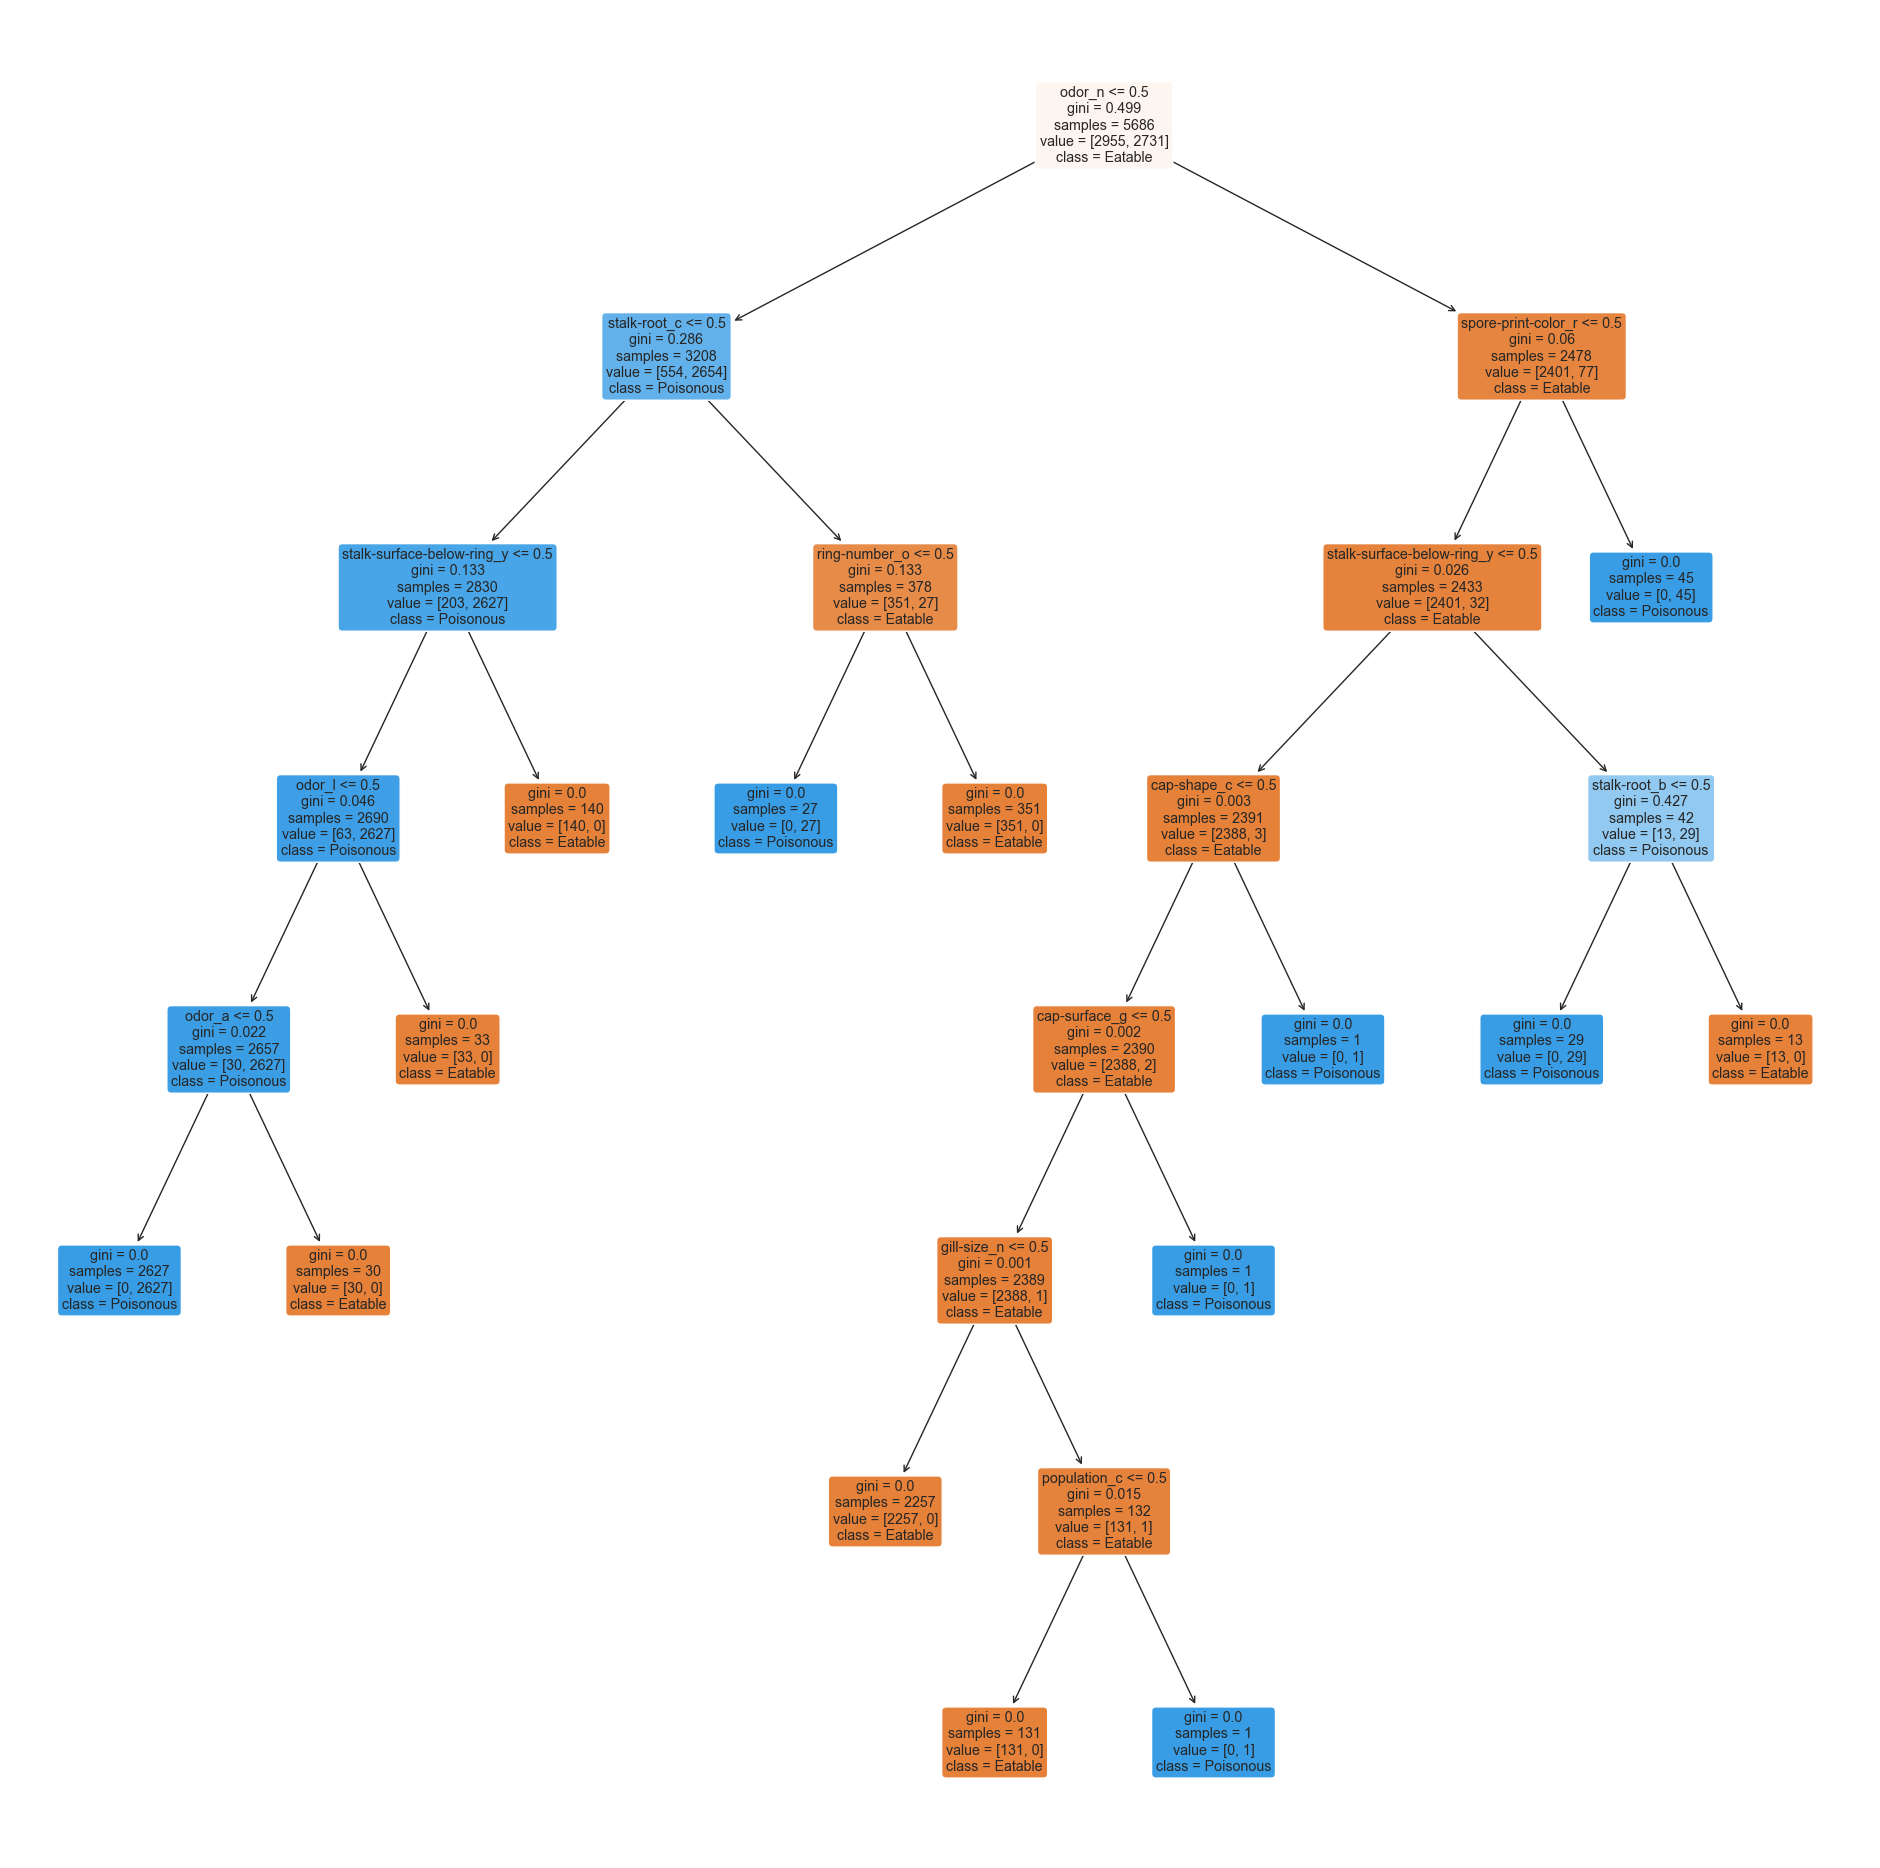

In [32]:
#depth 7
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 7)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


<AxesSubplot:>

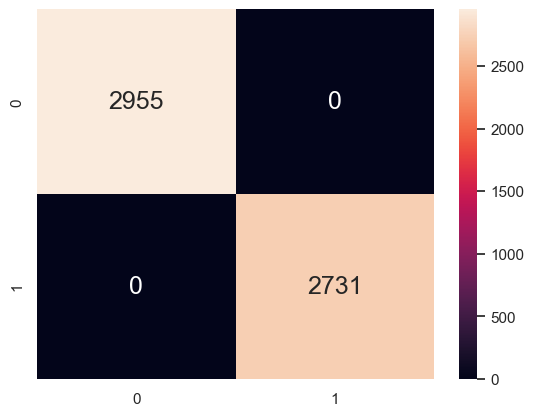

In [33]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 1.0

TPR Test :	 1.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.0


<AxesSubplot:>

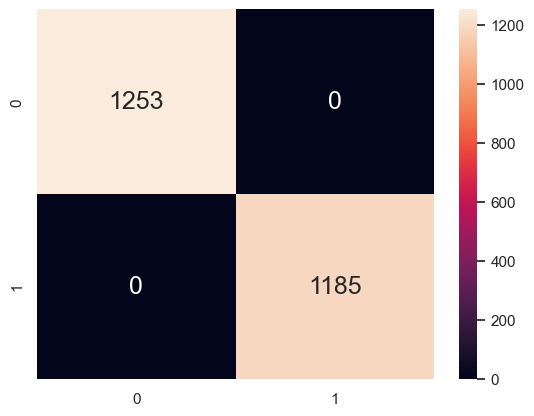

In [34]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

[Text(0.5882352941176471, 0.9285714285714286, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]\nclass = Eatable'),
 Text(0.35294117647058826, 0.7857142857142857, 'stalk-root_c <= 0.5\ngini = 0.295\nsamples = 3232\nvalue = [580, 2652]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.6428571428571429, 'stalk-root_r <= 0.5\ngini = 0.131\nsamples = 2834\nvalue = [200, 2634]\nclass = Poisonous'),
 Text(0.17647058823529413, 0.5, 'gill-spacing_c <= 0.5\ngini = 0.052\nsamples = 2707\nvalue = [73, 2634]\nclass = Poisonous'),
 Text(0.11764705882352941, 0.35714285714285715, 'bruises_f <= 0.5\ngini = 0.492\nsamples = 130\nvalue = [73, 57]\nclass = Eatable'),
 Text(0.058823529411764705, 0.21428571428571427, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]\nclass = Eatable'),
 Text(0.17647058823529413, 0.21428571428571427, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]\nclass = Poisonous'),
 Text(0.23529411764705882, 0.35714285714285715, 'gini = 0.0\nsamples = 2577\nvalue = [0, 2577]\nclas

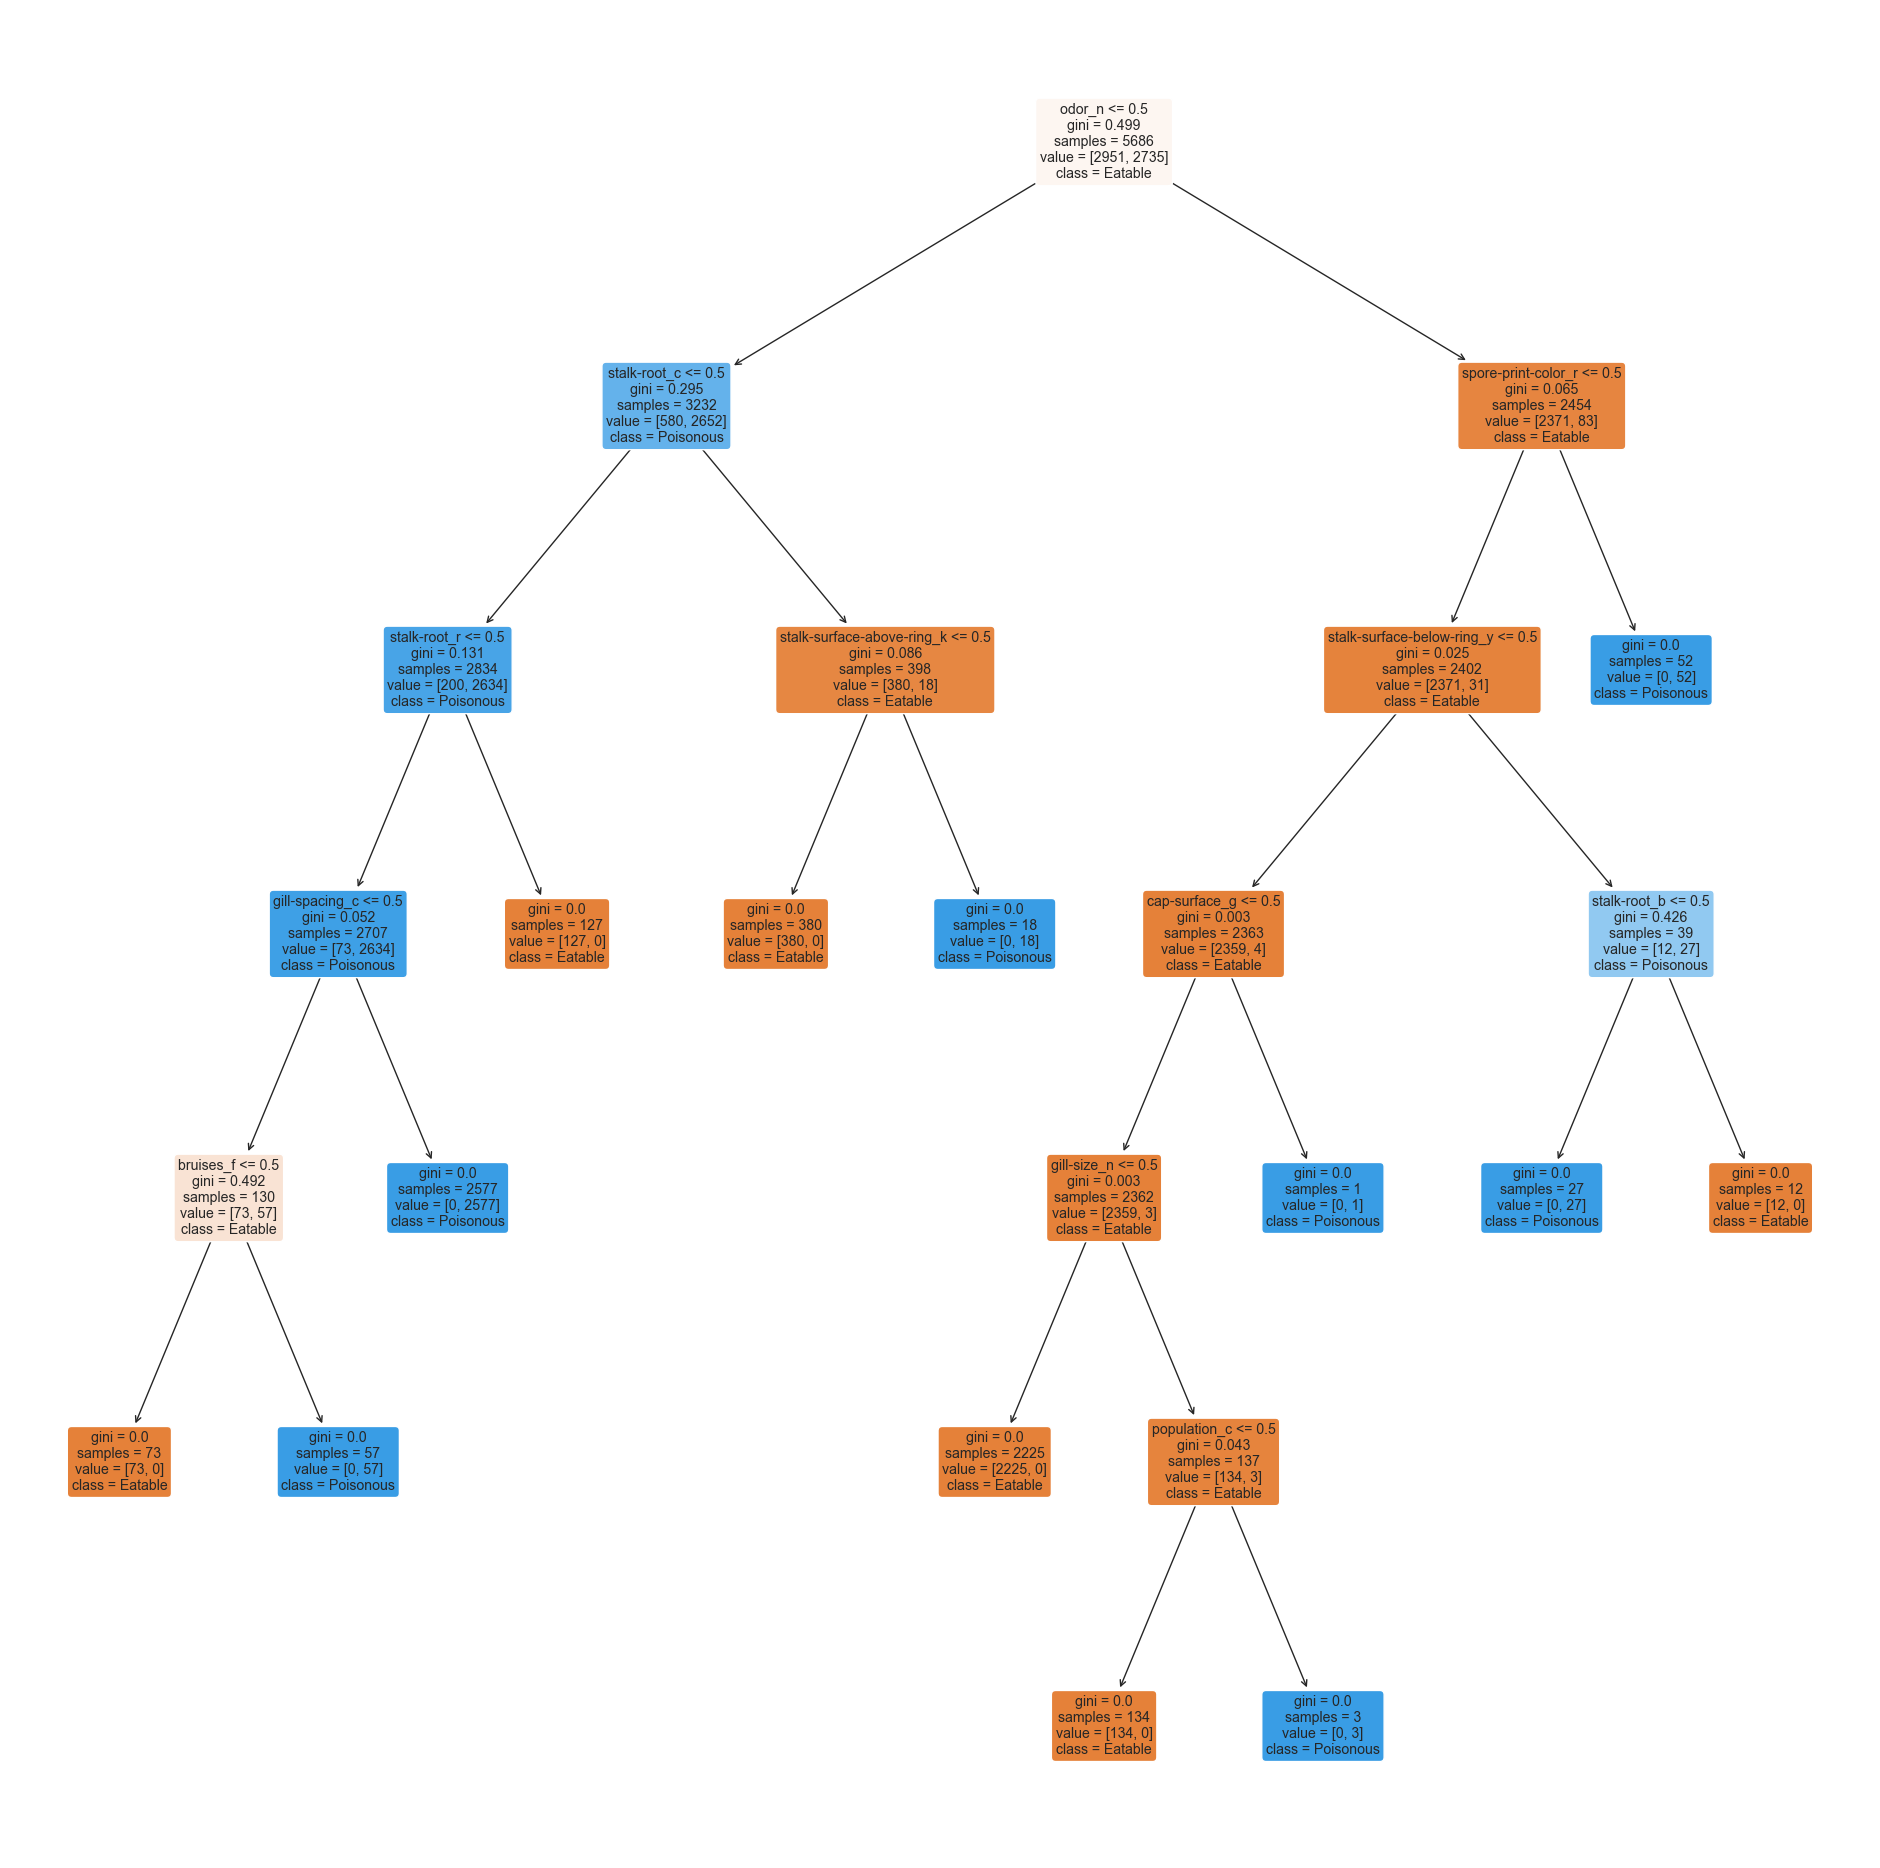

In [35]:
#depth 8
y = pd.DataFrame(mushroom_ohe['class'])
X = pd.DataFrame(mushroom_ohe.drop('class', axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
dectree = DecisionTreeClassifier(max_depth = 8)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

Train Data
Accuracy  :	 1.0

TPR Train :	 1.0
TNR Train :	 1.0

FPR Train :	 0.0
FNR Train :	 0.0


<AxesSubplot:>

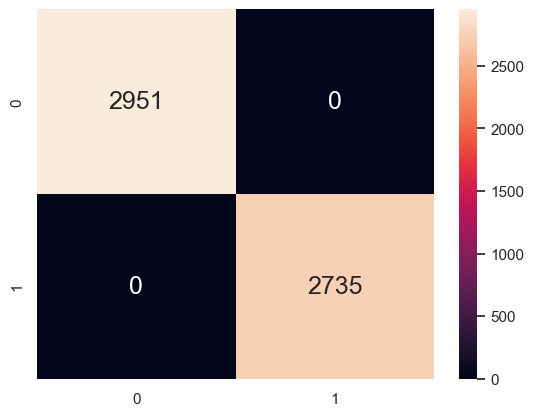

In [36]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 1.0

TPR Test :	 1.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.0


<AxesSubplot:>

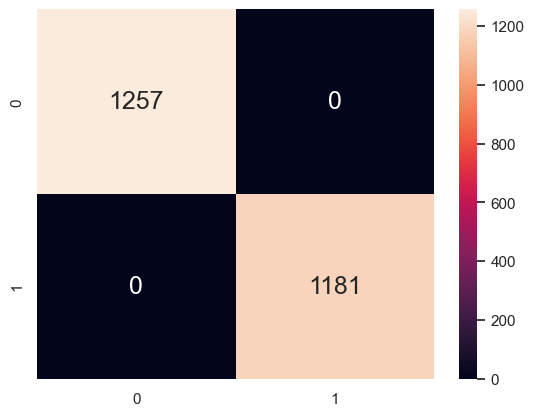

In [37]:
# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 1.0

TPR Test :	 1.0
TNR Test :	 1.0

FPR Test :	 0.0
FNR Test :	 0.0


<AxesSubplot:>

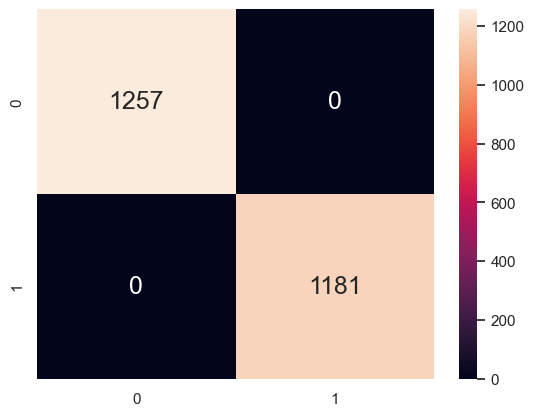

In [38]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [39]:
'''from sklearn.utils import resample

creditBad = creditData_ohe[creditData_ohe.Rating == 'Bad']
creditGood = creditData_ohe[creditData_ohe.Rating == 'Good']
 
# Upsample the Bad samples
creditBad_up = resample(creditBad, 
                        replace=True,                     # sample with replacement
                        n_samples=creditGood.shape[0])    # to match number of Good
 
# Combine the two classes back after upsampling
creditData_ohe_up = pd.concat([creditGood, creditBad_up])
 
# Check the ratio of the classes
creditData_ohe_up['Rating'].value_counts()'''

"from sklearn.utils import resample\n\ncreditBad = creditData_ohe[creditData_ohe.Rating == 'Bad']\ncreditGood = creditData_ohe[creditData_ohe.Rating == 'Good']\n \n# Upsample the Bad samples\ncreditBad_up = resample(creditBad, \n                        replace=True,                     # sample with replacement\n                        n_samples=creditGood.shape[0])    # to match number of Good\n \n# Combine the two classes back after upsampling\ncreditData_ohe_up = pd.concat([creditGood, creditBad_up])\n \n# Check the ratio of the classes\ncreditData_ohe_up['Rating'].value_counts()"

[Text(0.5625, 0.9285714285714286, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]\nclass = Eatable'),
 Text(0.3125, 0.7857142857142857, 'stalk-root_c <= 0.5\ngini = 0.295\nsamples = 3232\nvalue = [580, 2652]\nclass = Poisonous'),
 Text(0.1875, 0.6428571428571429, 'stalk-root_r <= 0.5\ngini = 0.131\nsamples = 2834\nvalue = [200, 2634]\nclass = Poisonous'),
 Text(0.125, 0.5, 'gill-spacing_w <= 0.5\ngini = 0.052\nsamples = 2707\nvalue = [73, 2634]\nclass = Poisonous'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.0\nsamples = 2577\nvalue = [0, 2577]\nclass = Poisonous'),
 Text(0.1875, 0.35714285714285715, 'stalk-shape_t <= 0.5\ngini = 0.492\nsamples = 130\nvalue = [73, 57]\nclass = Eatable'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]\nclass = Poisonous'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]\nclass = Eatable'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]\nclass = Eatable'),
 Text

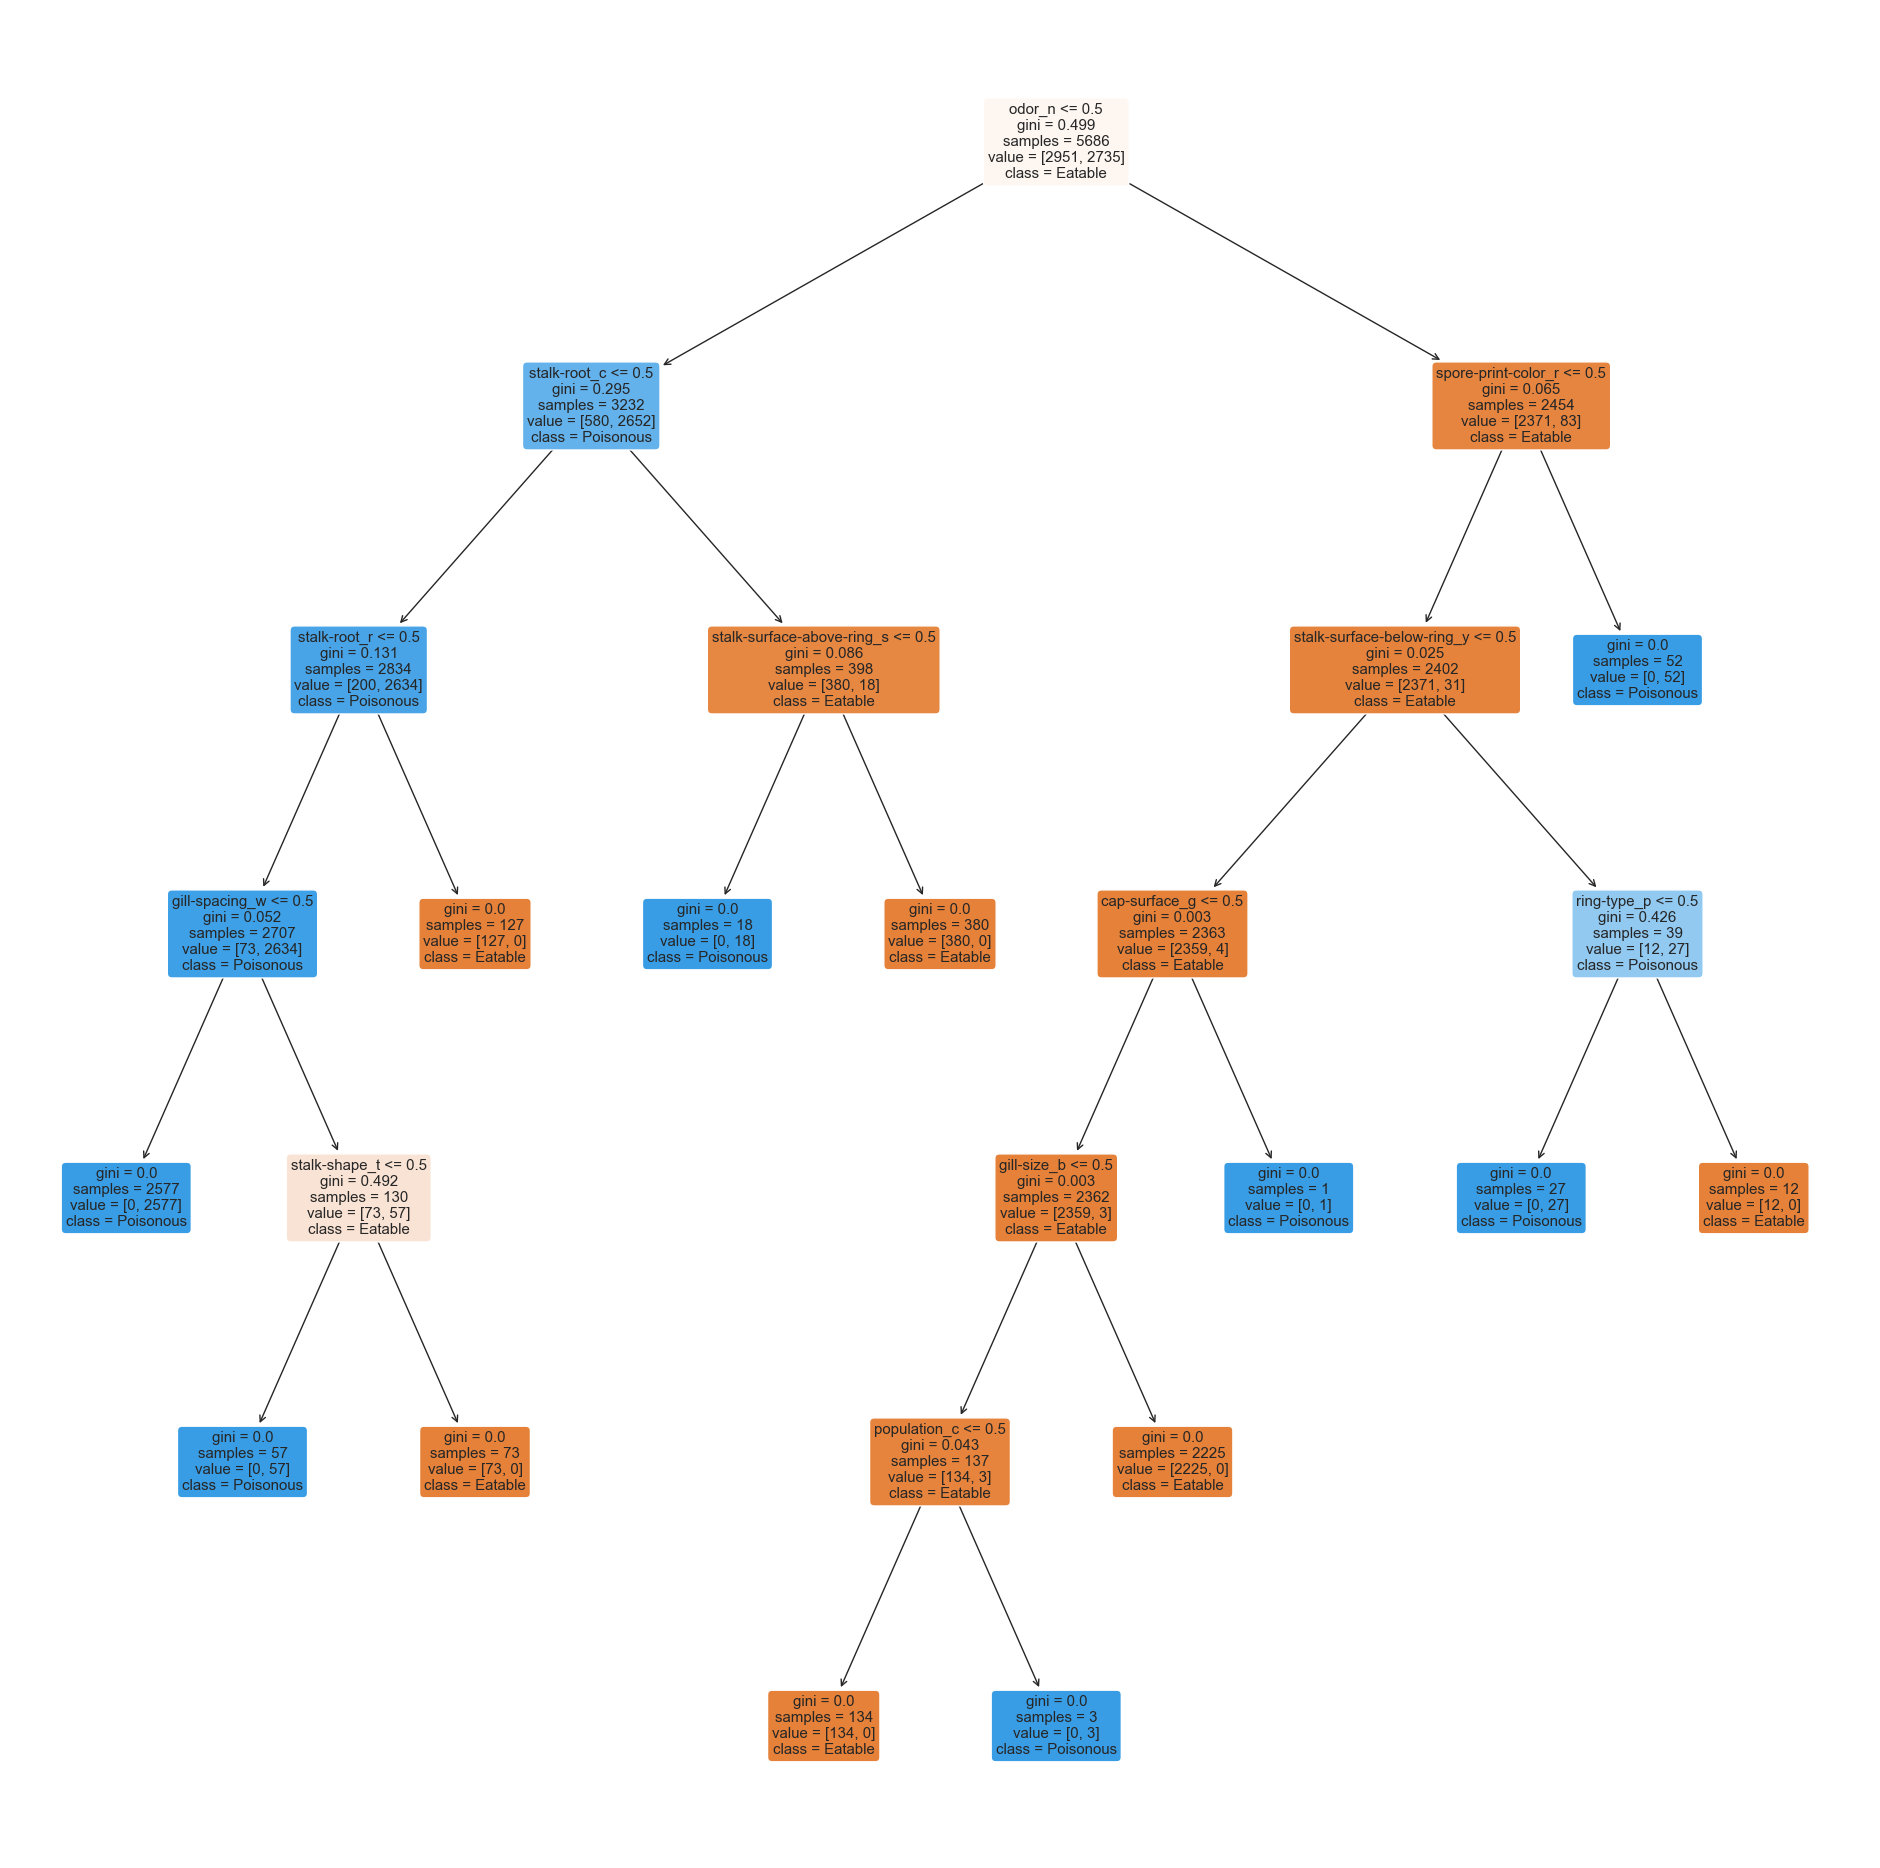

In [40]:
dectree = DecisionTreeClassifier(max_depth = 6)  # change max_depth to experiment
dectree.fit(X_train, y_train)
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])

[Text(0.5625, 0.9285714285714286, 'odor_n <= 0.5\ngini = 0.499\nsamples = 5686\nvalue = [2951, 2735]\nclass = Eatable'),
 Text(0.3125, 0.7857142857142857, 'stalk-root_c <= 0.5\ngini = 0.295\nsamples = 3232\nvalue = [580, 2652]\nclass = Poisonous'),
 Text(0.1875, 0.6428571428571429, 'stalk-root_r <= 0.5\ngini = 0.131\nsamples = 2834\nvalue = [200, 2634]\nclass = Poisonous'),
 Text(0.125, 0.5, 'gill-spacing_w <= 0.5\ngini = 0.052\nsamples = 2707\nvalue = [73, 2634]\nclass = Poisonous'),
 Text(0.0625, 0.35714285714285715, 'gini = 0.0\nsamples = 2577\nvalue = [0, 2577]\nclass = Poisonous'),
 Text(0.1875, 0.35714285714285715, 'stalk-shape_t <= 0.5\ngini = 0.492\nsamples = 130\nvalue = [73, 57]\nclass = Eatable'),
 Text(0.125, 0.21428571428571427, 'gini = 0.0\nsamples = 57\nvalue = [0, 57]\nclass = Poisonous'),
 Text(0.25, 0.21428571428571427, 'gini = 0.0\nsamples = 73\nvalue = [73, 0]\nclass = Eatable'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 127\nvalue = [127, 0]\nclass = Eatable'),
 Text

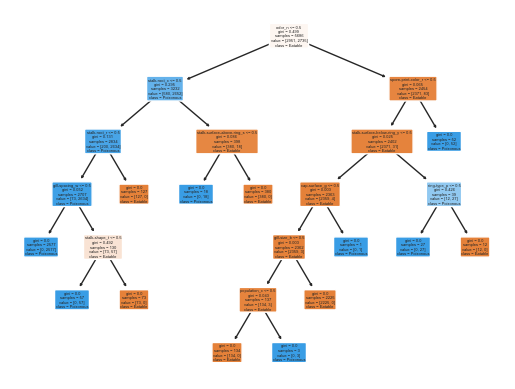

In [41]:
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Eatable","Poisonous"])